In [37]:
import sys
sys.path.append('/Users/yuch8913/miniforge3/envs/er3t_env/lib/python3.8/site-packages')
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from glob import glob
import numpy as np
from sys import exit as ext
import copy
from bisect import bisect_left
from oco_post_class_ywc import OCOSIM
from matplotlib import cm
from scipy.interpolate import interpn
from scipy import stats
from scipy.ndimage import uniform_filter
from  scipy.optimize import curve_fit
import geopy.distance
import xarray as xr
import seaborn as sns
from tool_code import *
import os, pickle 
from matplotlib import font_manager
from oco_satellite import satellite_download
import matplotlib.image as mpl_img

font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [2]:
cfg_name='20181018_central_asia_2_470cloud_test2.csv'

cfg_dir = '../simulation/cfg'


cfg_info = grab_cfg(f'{cfg_dir}/{cfg_name}')
if 'o2' in cfg_info.keys():
    id_num = output_h5_info(f'{cfg_dir}/{cfg_name}', 'o2')[-12:-3]
    boundary = [[float(i) for i in cfg_info['subdomain']], 'r']
else:
    boundary = [[float(i) for i in cfg_info['subdomain']], 'orange']
subdomain = cfg_info['subdomain']

In [3]:


with open(f'20181018_central_asia_2_470cloud_test_sfc_alb_0.300_sza_45.0_o2a.pkl', 'rb') as f:
    o1 = pickle.load(f)
with open(f'20181018_central_asia_2_470cloud_test_sfc_alb_0.300_sza_45.0_wco2.pkl', 'rb') as f:
    o2 = pickle.load(f)
with open(f'20181018_central_asia_2_470cloud_test_sfc_alb_0.300_sza_45.0_sco2.pkl', 'rb') as f:
    o3 = pickle.load(f)


cld_data = pd.read_pickle(f'{cfg_name[:-4]}_cld_distance.pkl')
cld_dist = cld_data['cld_dis']

In [3]:
with open(f'20181018_central_asia_2_470cloud_test2_o2a.pkl', 'rb') as f:
    o1 = pickle.load(f)
with open(f'20181018_central_asia_2_470cloud_test2_wco2.pkl', 'rb') as f:
    o2 = pickle.load(f)
with open(f'20181018_central_asia_2_470cloud_test2_sco2.pkl', 'rb') as f:
    o3 = pickle.load(f)


cld_data = pd.read_pickle(f'{cfg_name[:-4]}_cld_distance.pkl')
cld_dist = cld_data['cld_dis']

In [178]:
o3.rad_c3d_5.shape

(242, 302, 11)

In [179]:
cld_data.shape

(73084, 3)

In [180]:
self = o3
z = 150
fp = 150
#print(f'cloud distance: {cld_dist[z, fp]} km')
self.rad_c3d_5[z,fp,-1]

0.0009745039326236046

In [181]:
o1.toa

array([1.27486497, 1.27486497, 1.27486497, 1.27486497, 1.27486497,
       1.27486497, 1.27486497, 1.27486497, 1.27486497, 1.27486497,
       1.27486497])

In [182]:
o3.toa

array([0.11095671, 0.11095671, 0.11095671, 0.11095671, 0.11095671,
       0.11095671, 0.11095671, 0.11095671, 0.11095671, 0.11095671,
       0.11095671])

In [183]:
self.rad_c3d[z,fp,:]/self.toa*np.pi

array([0.02995252, 0.02932642, 0.03030781, 0.0274687 , 0.02464881,
       0.02849271, 0.03076638, 0.02735722, 0.02760498, 0.0306105 ,
       0.03002744])

In [184]:
self.rad_c3d_5[z,fp,:]/self.toa*np.pi

array([0.02644671, 0.02736683, 0.02783973, 0.02721128, 0.02697047,
       0.0273985 , 0.02762376, 0.02781857, 0.02703904, 0.0274664 ,
       0.02759179])

In [4]:
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
             [55.00, 55.60, 33.70, 34.45]]

title_size = 16
label_size = 14
legend_size = 14
tick_size = 12

0


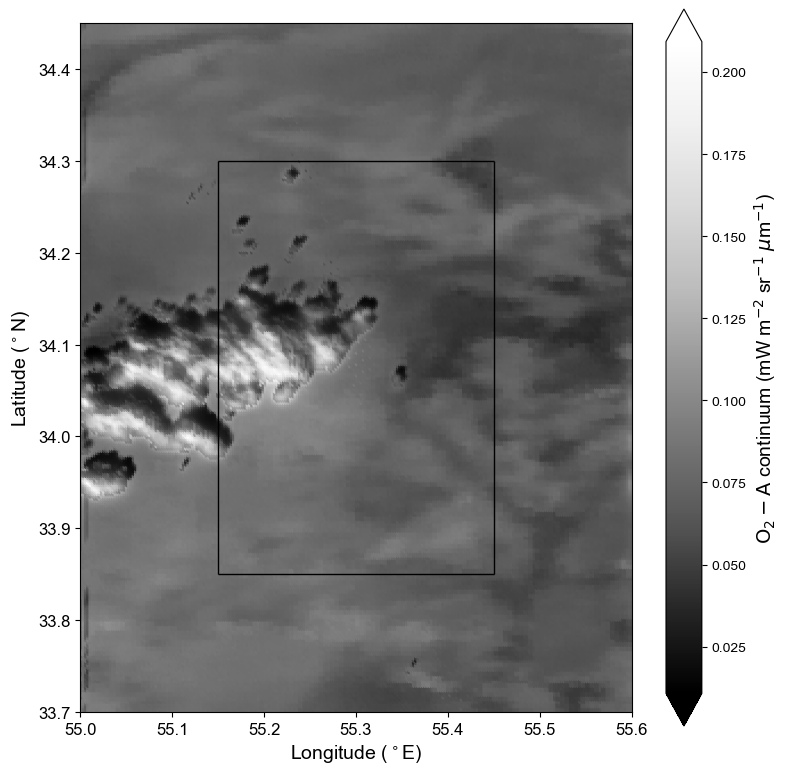

In [8]:
f, ax=plt.subplots(figsize=(8, 8))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
# ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
# ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
mask = np.isnan(getattr(o1, 'rad_c3d')[:,:,-1])
print(mask.sum())
c = ax.scatter(o1.lon2d, o1.lat2d, 
               c=getattr(o1, 'rad_c3d')[:,:,-1], s=5,
               cmap='Greys_r')
ax.scatter(o1.lon2d[mask], o1.lat2d[mask], 
               c='b', s=10,
               cmap='Reds')
cbar = f.colorbar(c, ax=ax, extend='both')
cbar.set_label('$\mathrm{O_2-A}$ continuum (mW m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()

In [4]:
title_size = 16
label_size = 14
legend_size = 14
tick_size = 12

In [4]:
predata = h5py.File('../simulation/data/20181018_central_asia_2_470cloud_test2_20181018/pre-data.h5', 'r')

In [5]:
predata.keys()

<KeysViewHDF5 ['cld_corr', 'cld_msk', 'extent', 'lat', 'lon', 'mca_ipa_thick', 'mca_ipa_thin', 'mod', 'oco']>

In [6]:
predata['mod/aod'].keys()

<KeysViewHDF5 ['AOD_550_land', 'AOD_550_land_mean', 'Angstrom_Exponent_land_mean', 'SSA_660_land_mean']>

In [7]:
modis_aod = predata['mod/aod/AOD_550_land'][...]
modis_lon, modis_lat = predata['lon'][...], predata['lat'][...]
modis_lon.shape

(242, 302)

In [9]:
modis_aod[modis_aod<0] = np.nan

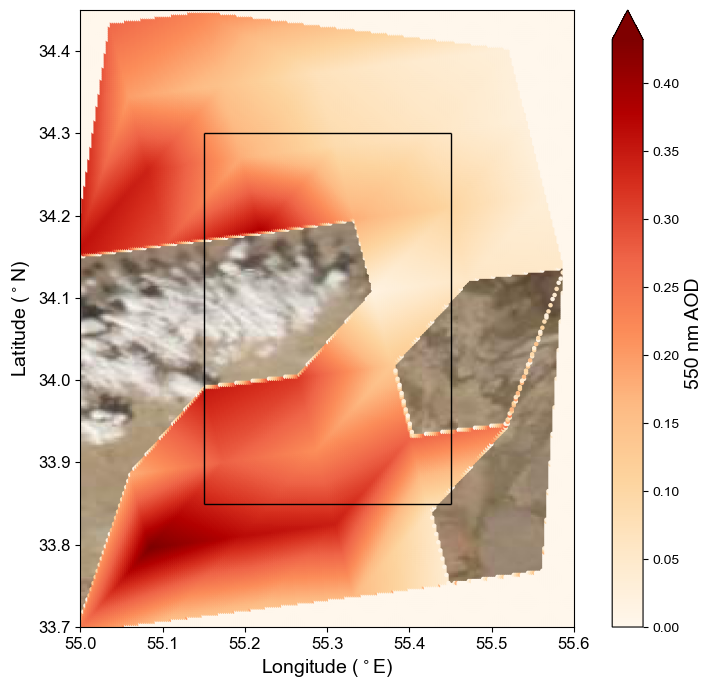

In [12]:
f, ax=plt.subplots(figsize=(8, 7))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
# ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
# ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
# mask = np.isnan(getattr(o1, 'rad_c3d')[:,:,-1])
# print(mask.sum())
c = ax.scatter(modis_lon, modis_lat,
               c=modis_aod, s=5,
               cmap='OrRd')
# ax.scatter(o1.lon2d[mask], o1.lat2d[mask], 
#                c='b', s=10,
#                cmap='Reds')
cbar = f.colorbar(c, ax=ax, extend='max')
cbar.set_label('550 nm AOD', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()
f.savefig('MODIS_AOD_20181018.png', dpi=300)

0


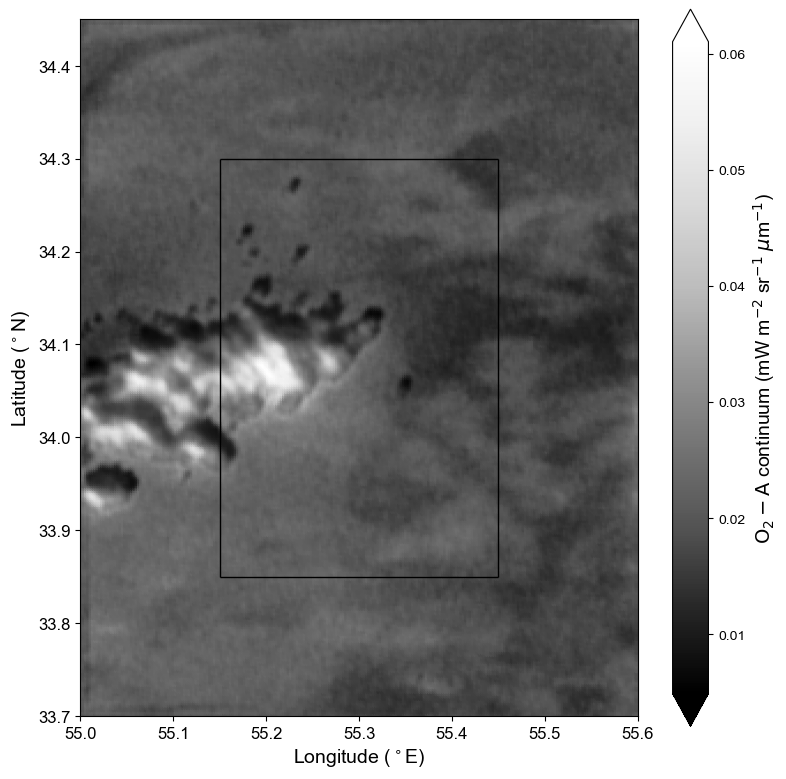

In [185]:
f, ax=plt.subplots(figsize=(8, 8))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
# ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
# ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
mask = np.isnan(getattr(o1, 'rad_c3d')[:,:,-1])
print(mask.sum())
c = ax.scatter(o1.lon2d, o1.lat2d, 
               c=getattr(o1, 'rad_c3d')[:,:,-1], s=5,
               cmap='Greys_r')
ax.scatter(o1.lon2d[mask], o1.lat2d[mask], 
               c='b', s=10,
               cmap='Reds')
cbar = f.colorbar(c, ax=ax, extend='both')
cbar.set_label('$\mathrm{O_2-A}$ continuum (mW m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()

0


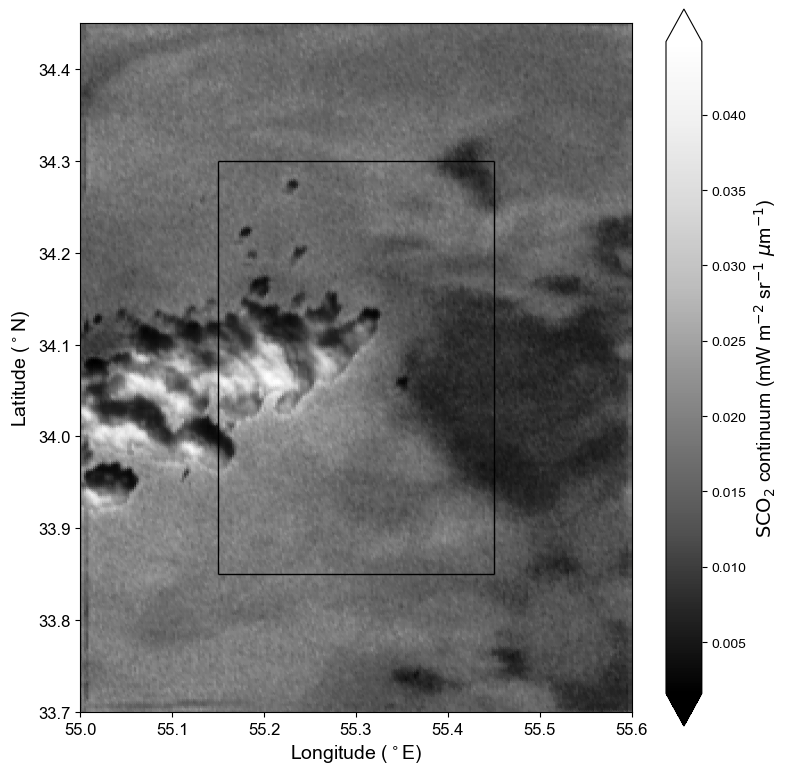

In [186]:
f, ax=plt.subplots(figsize=(8, 8))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
# ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
# ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
mask = np.isnan(getattr(o3, 'rad_c3d')[:,:,1])
print(mask.sum())
c = ax.scatter(o3.lon2d, o3.lat2d, 
               c=getattr(o3, 'rad_c3d')[:,:,1]/o3.toa[1], s=5,
               cmap='Greys_r')
ax.scatter(o3.lon2d[mask], o3.lat2d[mask], 
               c='b', s=10,
               cmap='Greys_r')
cbar = f.colorbar(c, ax=ax, extend='both')
cbar.set_label('$\mathrm{SCO_2}$ continuum (mW m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()

0


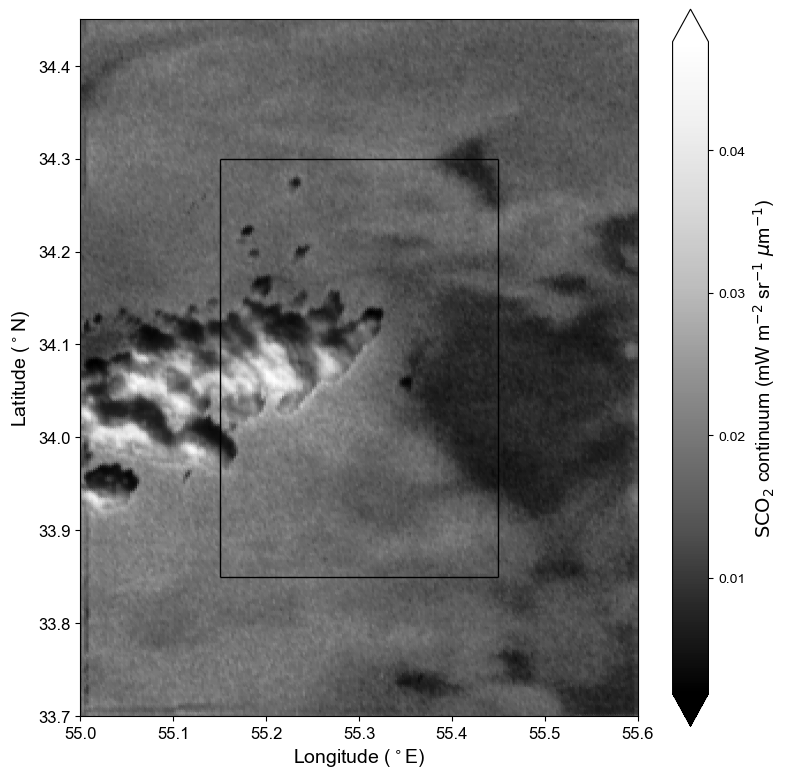

In [187]:
f, ax=plt.subplots(figsize=(8, 8))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
# ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
# ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
mask = np.isnan(getattr(o3, 'rad_c3d')[:,:,-1])
print(mask.sum())
c = ax.scatter(o3.lon2d, o3.lat2d, 
               c=getattr(o3, 'rad_c3d')[:,:,-1]/o3.toa[-1], s=5,
               cmap='Greys_r')
ax.scatter(o3.lon2d[mask], o3.lat2d[mask], 
               c='b', s=10,
               cmap='Greys_r')
cbar = f.colorbar(c, ax=ax, extend='both')
cbar.set_label('$\mathrm{SCO_2}$ continuum (mW m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()

In [189]:
self = o1
z = 150
fp = 150
#print(f'cloud distance: {cld_dist[z, fp]} km')
self.rad_c3d_5[z,fp,-1]

0.013443006520132538

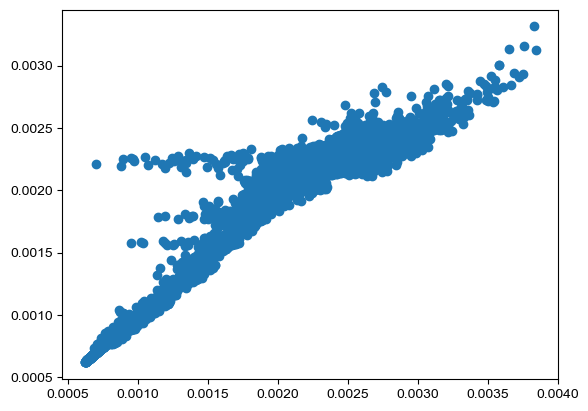

In [160]:
plt.scatter(self.rad_c3d_5[:,:,-1], self.rad_c1d_5[:,:,-1])
plt.show()

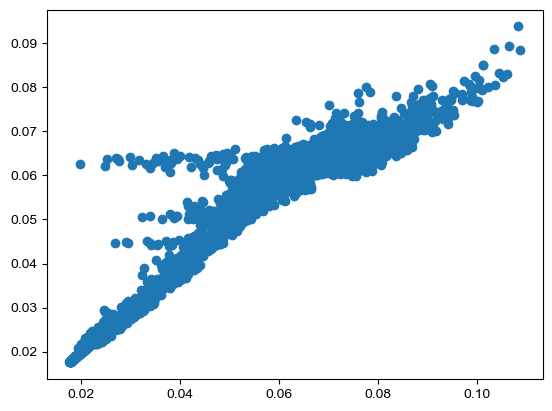

In [162]:
plt.scatter(self.rad_c3d_5[:,:,-1]/self.toa[-1]*np.pi, self.rad_c1d_5[:,:,-1]/self.toa[-1]*np.pi)
plt.show()

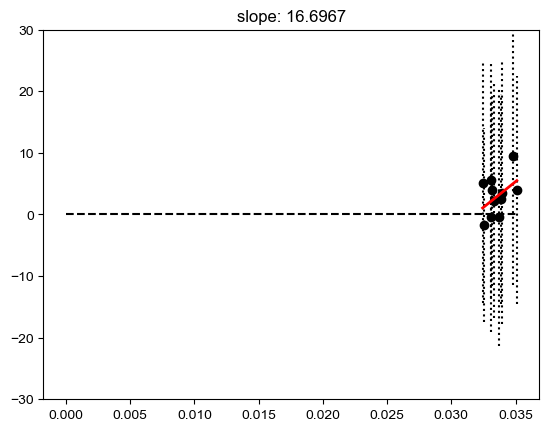

In [190]:


f,frame=plt.subplots()
frame.plot(self.rad_c3d_5[z,fp,:]/self.toa*np.pi,self.sl_5[z,fp,:]*100,'ko') 
for l,wl in enumerate(self.lam):
    frame.plot([self.rad_c3d_5[z,fp,l]/self.toa[l]*np.pi,self.rad_c3d_5[z,fp,l]/self.toa[l]*np.pi],
             np.array([self.sl_5[z,fp,l]-self.sls_5[z,fp,l],self.sl_5[z,fp,l]+self.sls_5[z,fp,l]])*100,'k:')        
slope, slopes = self.slope_5avg[z,fp,:]
intercept,intercepts = self.inter_5avg[z,fp,:]
mn = np.min(self.rad_c3d_5[z,fp,:]/self.toa[:]*np.pi)
mx = np.max(self.rad_c3d_5[z,fp,:]/self.toa[:]*np.pi)
xx=np.linspace(mn,mx,10)
yy=intercept+slope*xx
y1=intercept+intercepts+(slope+slopes)*xx
y2=intercept-intercepts+(slope-slopes)*xx
frame.plot(xx,yy*100,'r-',linewidth=2)  
frame.plot(xx,y1*100,'r:',linewidth=1)  
frame.plot(xx,y2*100,'r:',linewidth=1)  
frame.plot([0,mx],[0,0],'k--')
# ywc added
frame.set_title('slope: {:.4f}'.format(slope))
frame.set_ylim(-30, 30)

plt.show()

IndexError: index 150 is out of bounds for axis 0 with size 39

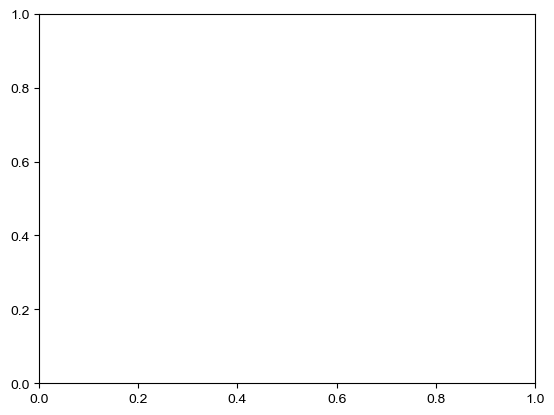

In [84]:


f,frame=plt.subplots()
frame.plot(self.rad_c3d[z,fp,:]/self.toa*np.pi,self.sl[z,fp,:]*100,'ko') 
for l,wl in enumerate(self.lam):
    frame.plot([self.rad_c3d[z,fp,l]/self.toa[l]*np.pi,self.rad_c3d[z,fp,l]/self.toa[l]*np.pi],
             np.array([self.sl[z,fp,l]-self.sls[z,fp,l],self.sl[z,fp,l]+self.sls[z,fp,l]])*100,'k:')        
slope, slopes = self.slopeavg[z,fp,:]
intercept,intercepts = self.interavg[z,fp,:]
mn = np.min(self.rad_c3d[z,fp,:]/self.toa[:]*np.pi)
mx = np.max(self.rad_c3d[z,fp,:]/self.toa[:]*np.pi)
xx=np.linspace(mn,mx,10)
yy=intercept+slope*xx
y1=intercept+intercepts+(slope+slopes)*xx
y2=intercept-intercepts+(slope-slopes)*xx
frame.plot(xx,yy*100,'r-',linewidth=2)  
frame.plot(xx,y1*100,'r:',linewidth=1)  
frame.plot(xx,y2*100,'r:',linewidth=1)  
frame.plot([0,mx],[0,0],'k--')
# ywc added
frame.set_title('slope: {:.4f}'.format(slope))
frame.set_ylim(-30, 30)

plt.show()

In [195]:
a = np.arange(12).reshape(3, -1)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [196]:
b = np.arange(-6, 6).reshape(3, -1)/10
b

array([[-0.6, -0.5, -0.4, -0.3],
       [-0.2, -0.1,  0. ,  0.1],
       [ 0.2,  0.3,  0.4,  0.5]])

In [199]:
np.column_stack((a.flatten(), b.flatten()))

array([[ 0. , -0.6],
       [ 1. , -0.5],
       [ 2. , -0.4],
       [ 3. , -0.3],
       [ 4. , -0.2],
       [ 5. , -0.1],
       [ 6. ,  0. ],
       [ 7. ,  0.1],
       [ 8. ,  0.2],
       [ 9. ,  0.3],
       [10. ,  0.4],
       [11. ,  0.5]])

In [197]:
np.transpose(np.vstack((a.flatten(), b.flatten())))

array([[ 0. , -0.6],
       [ 1. , -0.5],
       [ 2. , -0.4],
       [ 3. , -0.3],
       [ 4. , -0.2],
       [ 5. , -0.1],
       [ 6. ,  0. ],
       [ 7. ,  0.1],
       [ 8. ,  0.2],
       [ 9. ,  0.3],
       [10. ,  0.4],
       [11. ,  0.5]])

In [200]:
np.vstack((a.flatten(), b.flatten()))

array([[ 0. ,  1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ,
        11. ],
       [-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
         0.5]])

In [13]:

data = h5py.File('full-unperturbed20181018_with_imap.h5', 'r')


data2 = h5py.File('full-unperturbed20181018_with_imap2.h5', 'r')

mask = data['xco2_retrieved'][...]!=-2

key_list = ['aod', 'cpu_minutes', 'lat', 'lon', 'psur_MT_file', 'psur_retrieved',
            'rfl1', 'rfl2', 'rfl3', 'snd', 'xco2_L2_file', 'xco2_retrieved', 'xco2_weighted_column']
df1 = pd.DataFrame({key:data[key][...] for key in key_list})
df2 = pd.DataFrame({key:data2[key][...] for key in key_list})

In [79]:
data.keys()

<KeysViewHDF5 ['aod', 'cpu_minutes', 'lat', 'lon', 'pert_o2', 'pert_sco2', 'pert_wco2', 'psur_MT_file', 'psur_retrieved', 'rfl1', 'rfl2', 'rfl3', 'snd', 'xco2_L2_file', 'xco2_retrieved', 'xco2_weighted_column']>

In [82]:
data['pert_o2'][...][0, :]

array([3.670000e-06, 5.491685e-03])

In [14]:
df1['o2a_inter'] = data['pert_o2'][...][:, 0]
df1['o2a_slope'] = data['pert_o2'][...][:, 1]

df1['wco2_inter'] = data['pert_wco2'][...][:, 0]
df1['wco2_slope'] = data['pert_wco2'][...][:, 1]

df1['sco2_inter'] = data['pert_sco2'][...][:, 0]
df1['sco2_slope'] = data['pert_sco2'][...][:, 1]


df2['o2a_inter'] = data2['pert_o2'][...][:, 0]
df2['o2a_slope'] = data2['pert_o2'][...][:, 1]

df2['wco2_inter'] = data2['pert_wco2'][...][:, 0]
df2['wco2_slope'] = data2['pert_wco2'][...][:, 1]

df2['sco2_inter'] = data2['pert_sco2'][...][:, 0]
df2['sco2_slope'] = data2['pert_sco2'][...][:, 1]




In [17]:
df1.replace(-2, np.nan, inplace=True)


In [18]:
df1.dropna(axis=0, inplace=True)

In [19]:
df = pd.concat([df1, df2], ignore_index=True)

In [20]:
df.loc[df['xco2_L2_file']<1, 'xco2_L2_file'] = df.loc[df['xco2_L2_file']<1, 'xco2_L2_file']*1e6

In [21]:
df.drop_duplicates('snd', inplace=True)

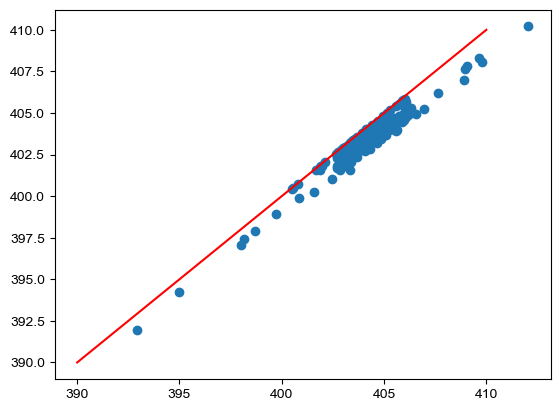

In [89]:

plt.scatter(df['xco2_L2_file'], df['xco2_retrieved'])
plt.plot([390, 410], [390, 410], 'r')

In [23]:
diff_xco2 = df['xco2_retrieved']-df['xco2_L2_file']


In [35]:
df['o2a_slope'].count()

170

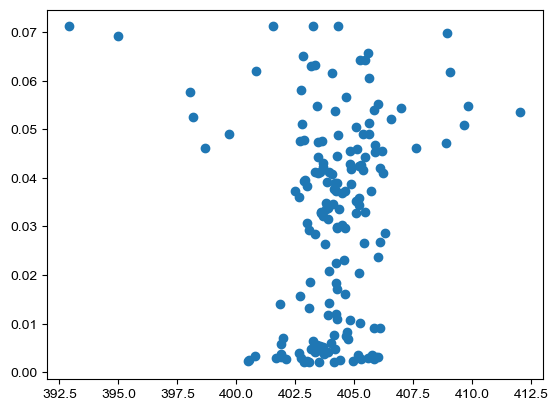

In [36]:
plt.scatter(df['xco2_L2_file'], df['o2a_slope'])

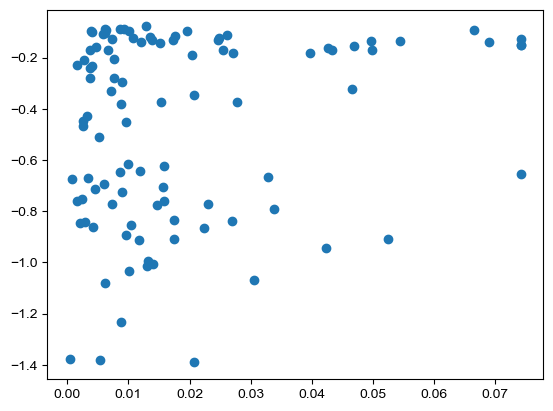

In [37]:
plt.scatter(data['pert_o2'][...][:, 0][mask], diff_xco2[mask])

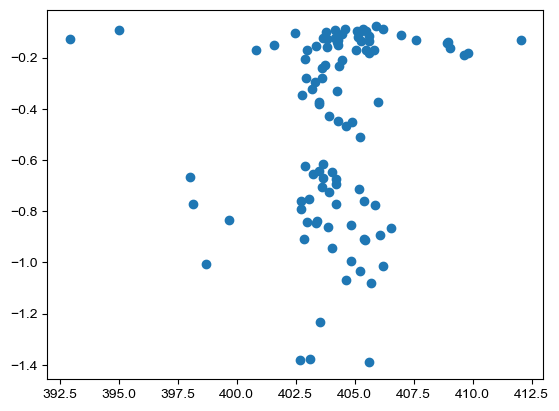

In [38]:
plt.scatter(data['xco2_L2_file'][...][mask]*1e6, diff_xco2[mask])

ValueError: x and y must be the same size

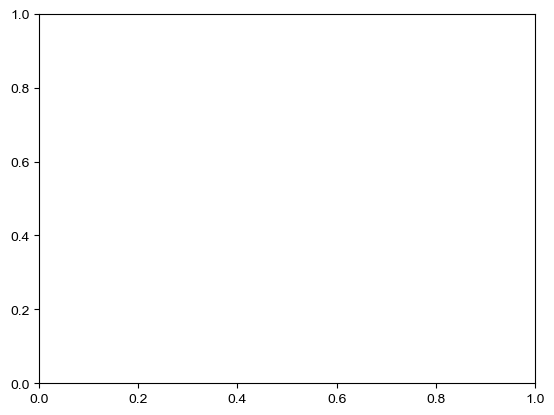

In [39]:
plt.scatter(data['pert_wco2'][...][:, 0][mask], diff_xco2)

In [15]:

png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
             [55.00, 55.60, 33.70, 34.45]]

title_size = 16
label_size = 14
legend_size = 14
tick_size = 12

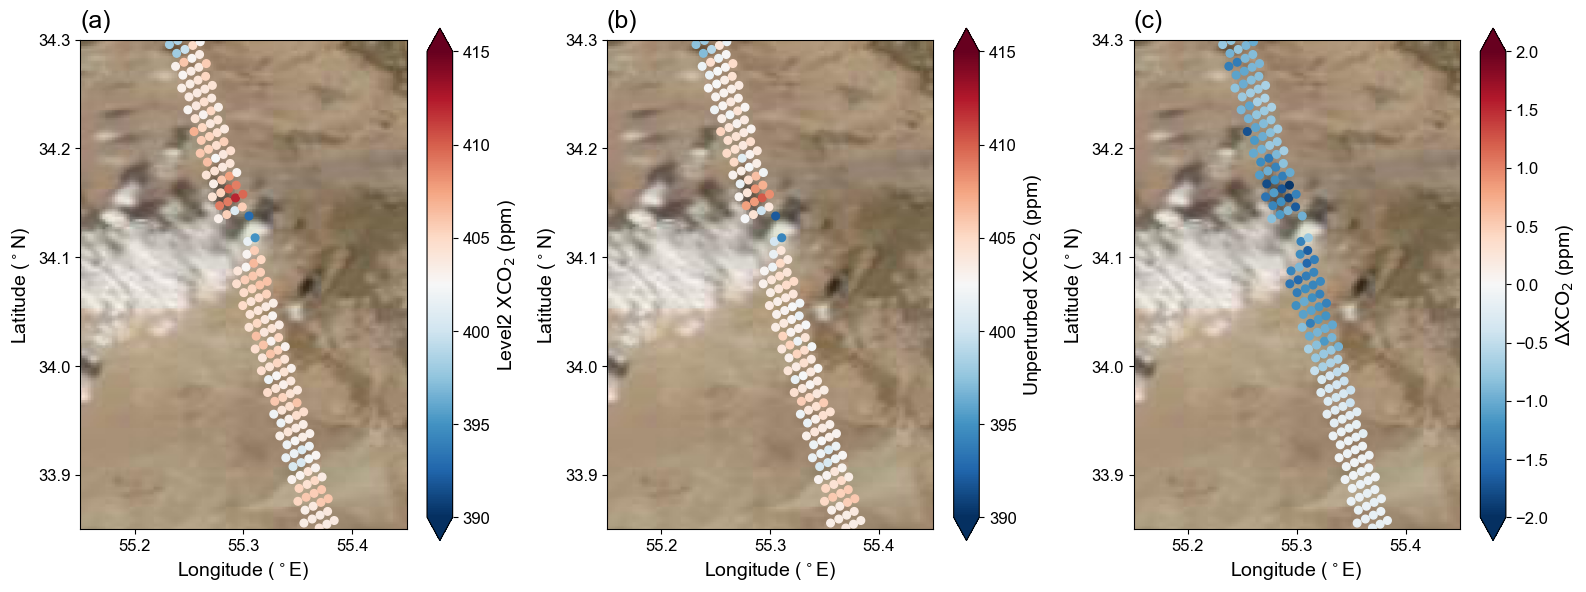

In [28]:
f, (ax1, ax2, ax3) =plt.subplots(1, 3, figsize=(16, 6))

img = png[0]
wesn= png[1]
img = mpimg.imread(img)
for ax in [ax1, ax2, ax3]:
    ax.imshow(img, extent=wesn)
    lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
    lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
    ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
    ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
    #ax.scatter(lon_2d[cth0>0], lat_2d[cth0>0], s=15, color='r')
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
    ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
    
mask = data['xco2_retrieved'][...]!=-2
c1 = ax1.scatter(df['lon'], df['lat'], 
               c=df['xco2_L2_file'], s=30,
               cmap='RdBu_r', vmin=390, vmax=415)
cbar1 = f.colorbar(c1, ax=ax1, extend='both')
cbar1.set_label('Level2 $\mathrm{XCO_2}$ (ppm)', fontsize=label_size)
cbar1.ax.tick_params(labelsize=tick_size)

c2 = ax2.scatter(df['lon'], df['lat'], 
               c=df['xco2_retrieved'], s=30,
               cmap='RdBu_r', vmin=390, vmax=415)
cbar2 = f.colorbar(c2, ax=ax2, extend='both')
cbar2.set_label('Unperturbed $\mathrm{XCO_2}$ (ppm)', fontsize=label_size)
cbar2.ax.tick_params(labelsize=tick_size)

c3 = ax3.scatter(df['lon'], df['lat'],
               c=diff_xco2, s=30,
               cmap='RdBu_r', vmin=-2, vmax=2)
cbar3 = f.colorbar(c3, ax=ax3, extend='both')
cbar3.set_label('$\Delta \mathrm{XCO_2}$ (ppm)', fontsize=label_size)
cbar3.ax.tick_params(labelsize=tick_size)



xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(a)', fontsize=label_size+4, color='k')

xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(b)', fontsize=label_size+4, color='k')

xmin, xmax = ax3.get_xlim()
ymin, ymax = ax3.get_ylim()
ax3.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(c)', fontsize=label_size+4, color='k')



#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')

f.tight_layout()
f.savefig('MODIS_XCO2_retrieval_before_after_20181018.png', dpi=300)

In [ ]:
data['lat'][...].max()

(array([ 3.,  1.,  4.,  7.,  4., 12., 32., 19.,  9.,  9.]),
 array([0.14928678, 0.16886908, 0.18845138, 0.20803368, 0.22761598,
        0.24719828, 0.26678058, 0.28636288, 0.30594518, 0.32552748,
        0.34510978]),
 <BarContainer object of 10 artists>)

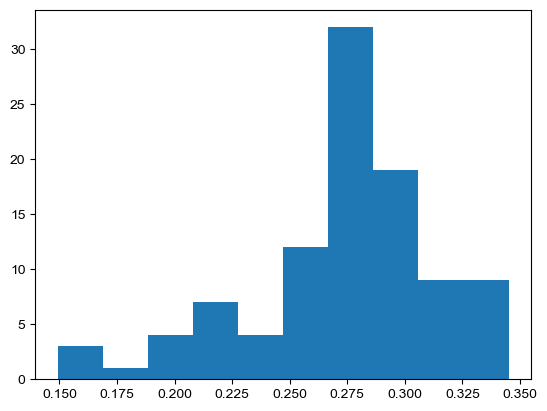

In [34]:
plt.hist(data['rfl1'][...][mask])

(array([ 2.,  2.,  3.,  5.,  7., 10., 37., 13.,  9., 12.]),
 array([0.16870748, 0.2005484 , 0.23238933, 0.26423025, 0.29607117,
        0.3279121 , 0.35975302, 0.39159395, 0.42343487, 0.45527579,
        0.48711672]),
 <BarContainer object of 10 artists>)

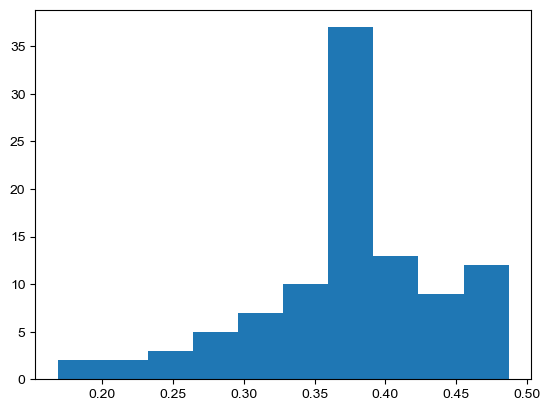

In [36]:
plt.hist(data['rfl3'][...][mask])

In [113]:
df['xco2_L2_file'].values

array([403.882, 402.995, 405.415, 404.22 , 403.111, 404.637, 404.835,
       404.228, 404.048, 403.91 , 404.203, 405.183, 403.063, 404.044,
       405.606, 405.221, 404.824, 403.635, 402.877, 403.48 , 402.733,
       405.88 , 406.072, 405.39 , 403.401, 403.233, 402.84 , 406.544,
       405.446, 406.184, 404.306, 408.949, 405.464, 401.567, 405.618,
       405.084, 404.184, 403.349, 405.256, 409.038, 400.837, 395.   ,
       405.887, 406.218, 404.294, 405.826, 409.8  , 412.037, 405.593,
       392.925, 406.975, 405.627, 405.363, 402.476, 403.679, 407.613,
       408.907, 409.646, 402.884, 404.269, 405.123, 405.285, 404.596,
       403.787, 404.157, 402.927, 403.327, 403.601, 403.814, 402.982,
       403.848, 404.464, 405.473, 404.627, 403.18 , 402.78 , 403.474,
       403.604, 404.468, 405.068, 404.345, 403.674, 398.165, 398.023,
       405.986, 403.48 , 404.252, 403.898, 403.759, 403.347, 398.686,
       399.695, 402.714, 403.676, 405.216, 404.275, 404.882, 403.534,
       405.708, 402.

/var/folders/7r/hs2l3pt92m92by1jz_x3d97400b9nz/T/ipykernel_54991/3336000493.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


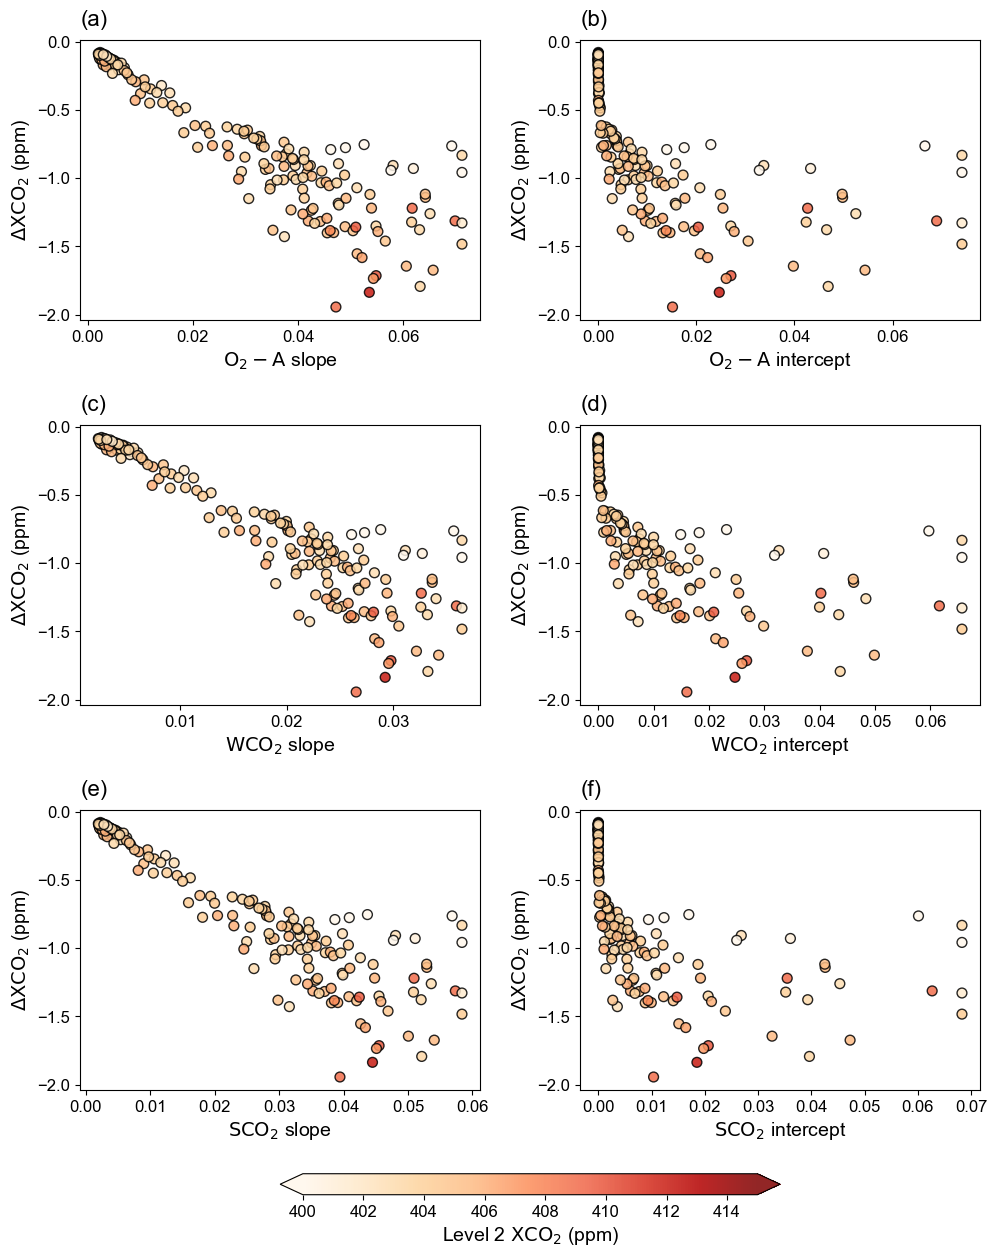

In [29]:
fig = plt.figure(figsize=(10, 14))

ax11 = fig.add_axes([0.05, 0.7, 0.4, 0.2])
ax12 = fig.add_axes([0.55, 0.7, 0.4, 0.2])

ax21 = fig.add_axes([0.05, 0.425, 0.4, 0.2])
ax22 = fig.add_axes([0.55, 0.425, 0.4, 0.2])

ax31 = fig.add_axes([0.05, 0.15, 0.4, 0.2])
ax32 = fig.add_axes([0.55, 0.15, 0.4, 0.2])

ax_cbar = fig.add_axes([0.25, 0.075, 0.5, 0.015])

# ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
# ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)

plot_setting = dict(s=50, 
                c=df['xco2_L2_file'].values,
                alpha=0.85,
                cmap='OrRd', vmin=400, vmax=415, edgecolor='k')

c = ax11.scatter(df.o2a_slope.values, diff_xco2, **plot_setting) 
cbar = fig.colorbar(c, cax=ax_cbar, extend='both', orientation='horizontal')
cbar.set_label('Level 2 $\mathrm{XCO_2}$ (ppm)', fontsize=label_size)
cbar.ax.tick_params(labelsize=tick_size)

ax12.scatter(df.o2a_inter.values, diff_xco2, **plot_setting)
ax21.scatter(df.wco2_slope.values, diff_xco2, **plot_setting)
ax22.scatter(df.wco2_inter.values, diff_xco2, **plot_setting)
ax31.scatter(df.sco2_slope.values, diff_xco2, **plot_setting)
ax32.scatter(df.sco2_inter.values, diff_xco2, **plot_setting)

ax_list = [ax11, ax12, ax21, ax22, ax31, ax32]
label_list = ['a', 'b', 'c', 'd', 'e', 'f']
for i in range(6):
    ax = ax_list[i]
    ax.set_ylabel('$\Delta \mathrm{XCO_2}$ (ppm)', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.text(xmin+0.0*(xmax-xmin), ymin+1.05*(ymax-ymin), f'({label_list[i]})', fontsize=label_size+2, color='k')

ax11.set_xlabel('$\mathrm{O_2-A}$ slope', fontsize=label_size)
ax12.set_xlabel('$\mathrm{O_2-A}$ intercept', fontsize=label_size)
ax21.set_xlabel('$\mathrm{WCO_2}$ slope', fontsize=label_size)
ax22.set_xlabel('$\mathrm{WCO_2}$ intercept', fontsize=label_size)
ax31.set_xlabel('$\mathrm{SCO_2}$ slope', fontsize=label_size)
ax32.set_xlabel('$\mathrm{SCO_2}$ intercept', fontsize=label_size)
fig.tight_layout()
fig.savefig('Delta_XCO2_3d_para_3_bands_20181018.png', dpi=300)

/var/folders/7r/hs2l3pt92m92by1jz_x3d97400b9nz/T/ipykernel_54991/1675802102.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


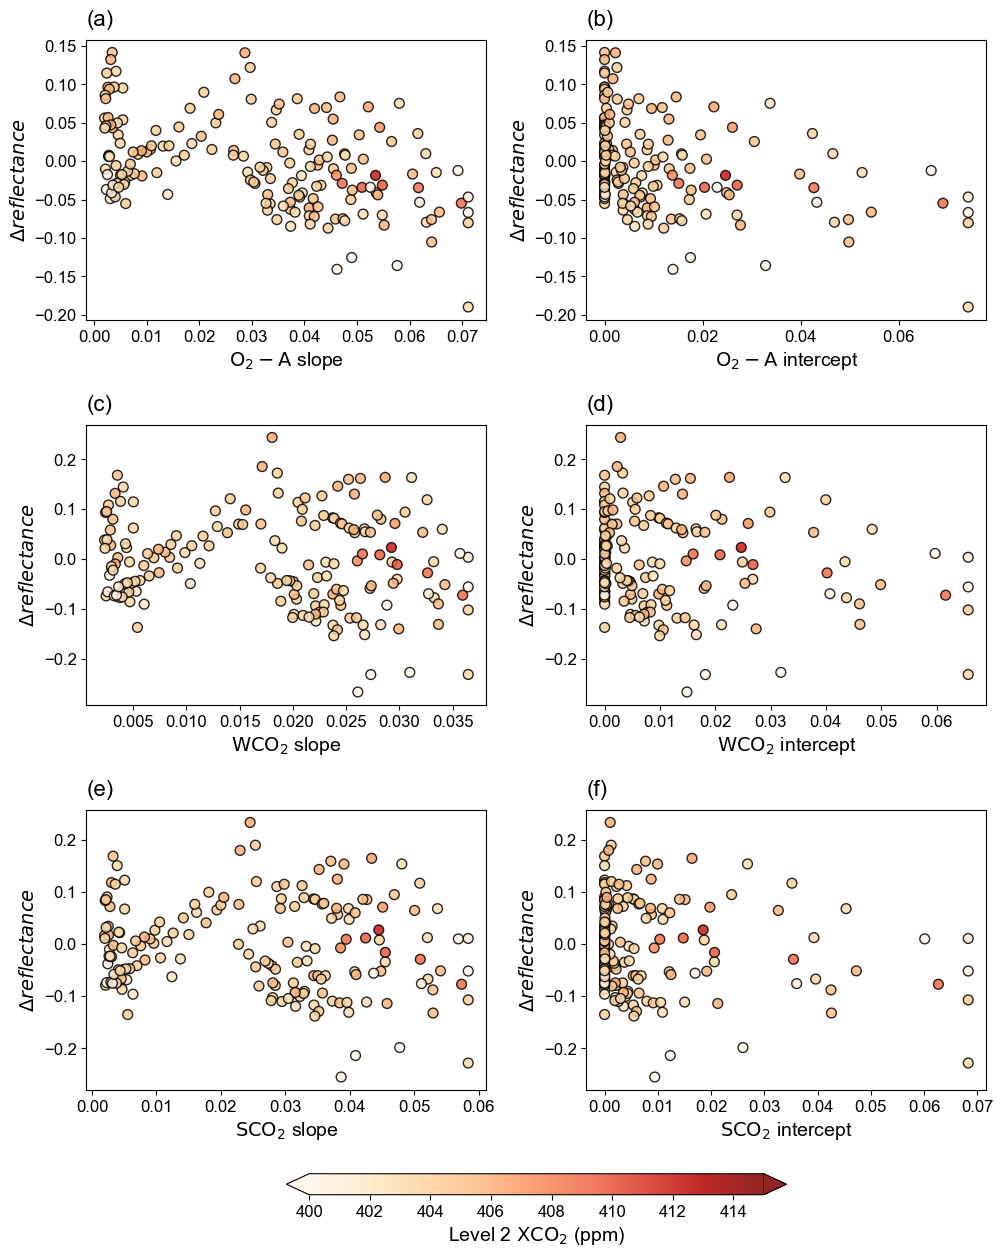

In [47]:
fig = plt.figure(figsize=(10, 14))

ax11 = fig.add_axes([0.05, 0.7, 0.4, 0.2])
ax12 = fig.add_axes([0.55, 0.7, 0.4, 0.2])

ax21 = fig.add_axes([0.05, 0.425, 0.4, 0.2])
ax22 = fig.add_axes([0.55, 0.425, 0.4, 0.2])

ax31 = fig.add_axes([0.05, 0.15, 0.4, 0.2])
ax32 = fig.add_axes([0.55, 0.15, 0.4, 0.2])

ax_cbar = fig.add_axes([0.25, 0.075, 0.5, 0.015])

# ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
# ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)

plot_setting = dict(s=50, 
                c=df['xco2_L2_file'].values,
                alpha=0.85,
                cmap='OrRd', vmin=400, vmax=415, edgecolor='k')

c = ax11.scatter(df.o2a_slope.values, df.rfl1-l2_o2a_ref, **plot_setting) 
cbar = fig.colorbar(c, cax=ax_cbar, extend='both', orientation='horizontal')
cbar.set_label('Level 2 $\mathrm{XCO_2}$ (ppm)', fontsize=label_size)
cbar.ax.tick_params(labelsize=tick_size)

ax12.scatter(df.o2a_inter.values, df.rfl1-l2_o2a_ref, **plot_setting)
ax21.scatter(df.wco2_slope.values, df.rfl2-l2_wco2_ref, **plot_setting)
ax22.scatter(df.wco2_inter.values, df.rfl2-l2_wco2_ref, **plot_setting)
ax31.scatter(df.sco2_slope.values, df.rfl3-l2_sco2_ref, **plot_setting)
ax32.scatter(df.sco2_inter.values, df.rfl3-l2_sco2_ref, **plot_setting)

ax_list = [ax11, ax12, ax21, ax22, ax31, ax32]
label_list = ['a', 'b', 'c', 'd', 'e', 'f']
for i in range(6):
    ax = ax_list[i]
    ax.set_ylabel('$\Delta reflectance$', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.text(xmin+0.0*(xmax-xmin), ymin+1.05*(ymax-ymin), f'({label_list[i]})', fontsize=label_size+2, color='k')

ax11.set_xlabel('$\mathrm{O_2-A}$ slope', fontsize=label_size)
ax12.set_xlabel('$\mathrm{O_2-A}$ intercept', fontsize=label_size)
ax21.set_xlabel('$\mathrm{WCO_2}$ slope', fontsize=label_size)
ax22.set_xlabel('$\mathrm{WCO_2}$ intercept', fontsize=label_size)
ax31.set_xlabel('$\mathrm{SCO_2}$ slope', fontsize=label_size)
ax32.set_xlabel('$\mathrm{SCO_2}$ intercept', fontsize=label_size)
fig.tight_layout()
fig.savefig('Delta_reflectance_3d_para_3_bands_20181018.png', dpi=300)

/var/folders/7r/hs2l3pt92m92by1jz_x3d97400b9nz/T/ipykernel_54991/3780567139.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


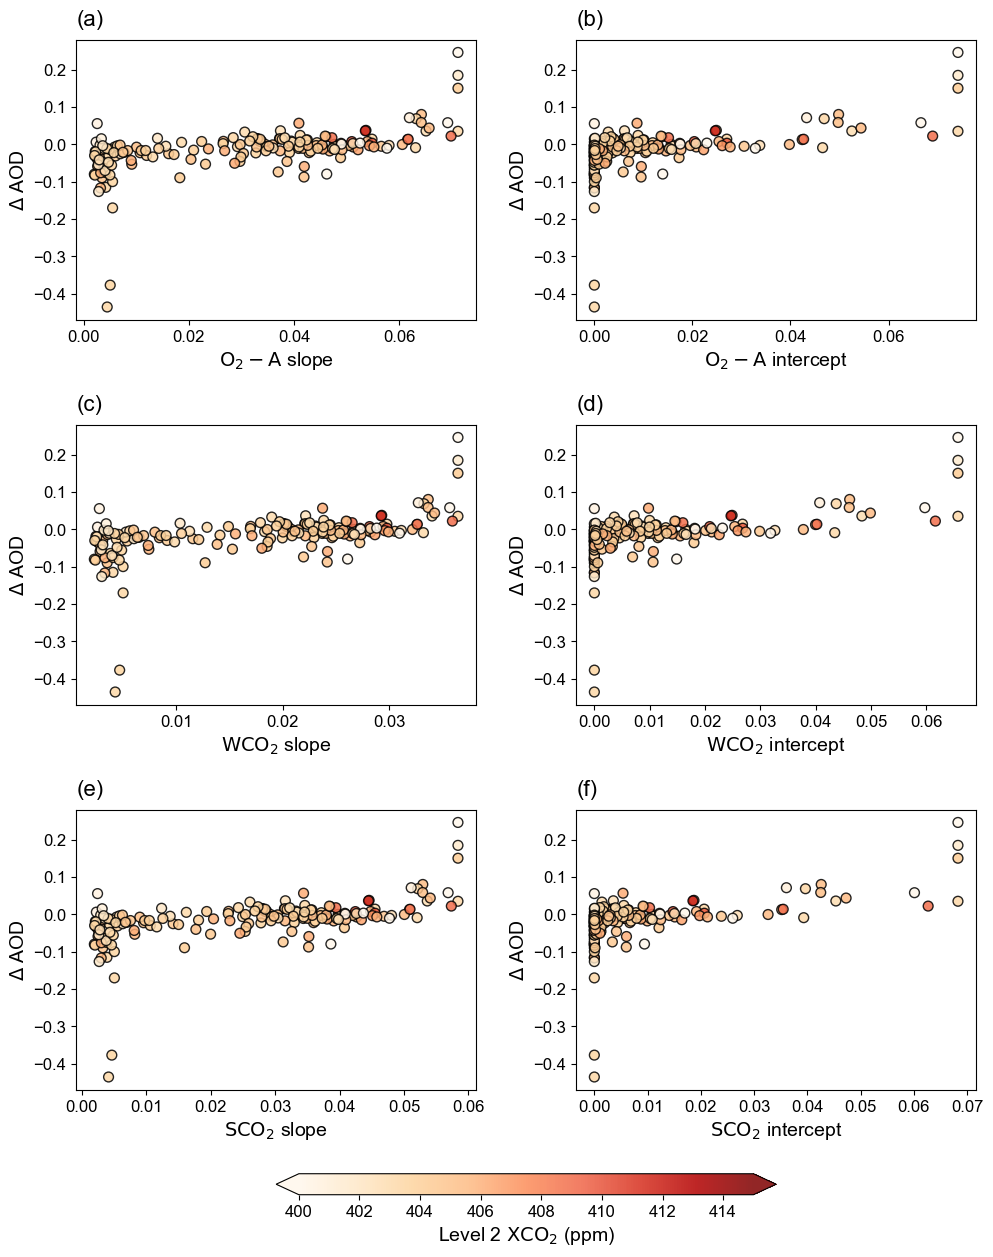

In [48]:
fig = plt.figure(figsize=(10, 14))

ax11 = fig.add_axes([0.05, 0.7, 0.4, 0.2])
ax12 = fig.add_axes([0.55, 0.7, 0.4, 0.2])

ax21 = fig.add_axes([0.05, 0.425, 0.4, 0.2])
ax22 = fig.add_axes([0.55, 0.425, 0.4, 0.2])

ax31 = fig.add_axes([0.05, 0.15, 0.4, 0.2])
ax32 = fig.add_axes([0.55, 0.15, 0.4, 0.2])

ax_cbar = fig.add_axes([0.25, 0.075, 0.5, 0.015])

# ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
# ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)

plot_setting = dict(s=50, 
                c=df['xco2_L2_file'].values,
                alpha=0.85,
                cmap='OrRd', vmin=400, vmax=415, edgecolor='k')

c = ax11.scatter(df.o2a_slope.values, df.aod-l2_aod, **plot_setting) 
cbar = fig.colorbar(c, cax=ax_cbar, extend='both', orientation='horizontal')
cbar.set_label('Level 2 $\mathrm{XCO_2}$ (ppm)', fontsize=label_size)
cbar.ax.tick_params(labelsize=tick_size)

ax12.scatter(df.o2a_inter.values, df.aod-l2_aod, **plot_setting)
ax21.scatter(df.wco2_slope.values, df.aod-l2_aod, **plot_setting)
ax22.scatter(df.wco2_inter.values, df.aod-l2_aod, **plot_setting)
ax31.scatter(df.sco2_slope.values, df.aod-l2_aod, **plot_setting)
ax32.scatter(df.sco2_inter.values, df.aod-l2_aod, **plot_setting)

ax_list = [ax11, ax12, ax21, ax22, ax31, ax32]
label_list = ['a', 'b', 'c', 'd', 'e', 'f']
for i in range(6):
    ax = ax_list[i]
    ax.set_ylabel('$\Delta$ AOD', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.text(xmin+0.0*(xmax-xmin), ymin+1.05*(ymax-ymin), f'({label_list[i]})', fontsize=label_size+2, color='k')

ax11.set_xlabel('$\mathrm{O_2-A}$ slope', fontsize=label_size)
ax12.set_xlabel('$\mathrm{O_2-A}$ intercept', fontsize=label_size)
ax21.set_xlabel('$\mathrm{WCO_2}$ slope', fontsize=label_size)
ax22.set_xlabel('$\mathrm{WCO_2}$ intercept', fontsize=label_size)
ax31.set_xlabel('$\mathrm{SCO_2}$ slope', fontsize=label_size)
ax32.set_xlabel('$\mathrm{SCO_2}$ intercept', fontsize=label_size)
fig.tight_layout()
fig.savefig('Delta_AOD_3d_para_3_bands_20181018.png', dpi=300)

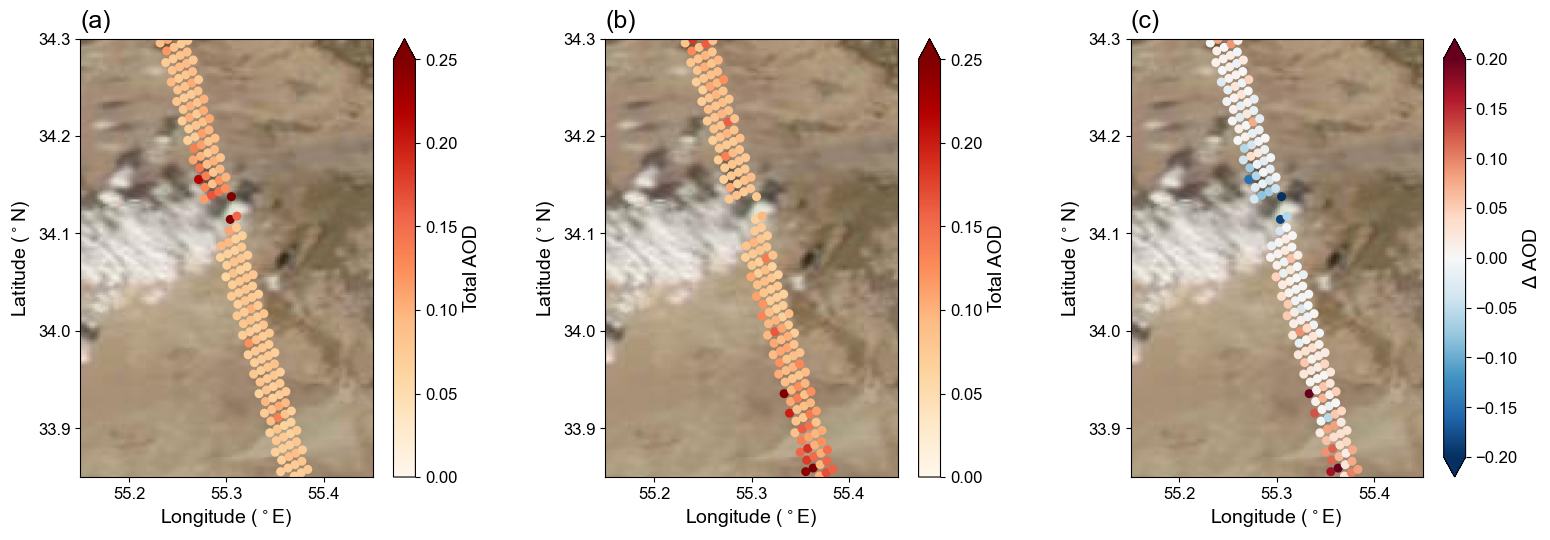

In [49]:
f, (ax1, ax2, ax3) =plt.subplots(1, 3, figsize=(16, 5.5))

img = png[0]
wesn= png[1]
img = mpimg.imread(img)
for ax in [ax1, ax2, ax3]:
    ax.imshow(img, extent=wesn)
    lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
    lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
    ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
    ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
    #ax.scatter(lon_2d[cth0>0], lat_2d[cth0>0], s=15, color='r')
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
    ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
    
mask = data['xco2_retrieved'][...]!=-2
c1 = ax1.scatter(df['lon'], df['lat'], 
               c=df.aod, s=30,
               cmap='OrRd', vmin=0, vmax=0.25)
cbar1 = f.colorbar(c1, ax=ax1, extend='max')
cbar1.set_label('Total AOD', fontsize=label_size)
cbar1.ax.tick_params(labelsize=tick_size)

c2 = ax2.scatter(df['lon'], df['lat'], 
               c=l2_aod, s=30,
               cmap='OrRd', vmin=0, vmax=0.25)
cbar2 = f.colorbar(c2, ax=ax2, extend='max')
cbar2.set_label('Total AOD', fontsize=label_size)
cbar2.ax.tick_params(labelsize=tick_size)

c3 = ax3.scatter(df['lon'], df['lat'],
               c=l2_aod-df.aod, s=30,
               cmap='RdBu_r', vmin=-0.2, vmax=0.2)
cbar3 = f.colorbar(c3, ax=ax3, extend='both')
cbar3.set_label('$\Delta$ AOD', fontsize=label_size)
cbar3.ax.tick_params(labelsize=tick_size)



xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(a)', fontsize=label_size+4, color='k')

xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(b)', fontsize=label_size+4, color='k')

xmin, xmax = ax3.get_xlim()
ymin, ymax = ax3.get_ylim()
ax3.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(c)', fontsize=label_size+4, color='k')



#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')

f.tight_layout()
f.savefig('MODIS_AOD_retrieval_before_after_20181018.png', dpi=300)

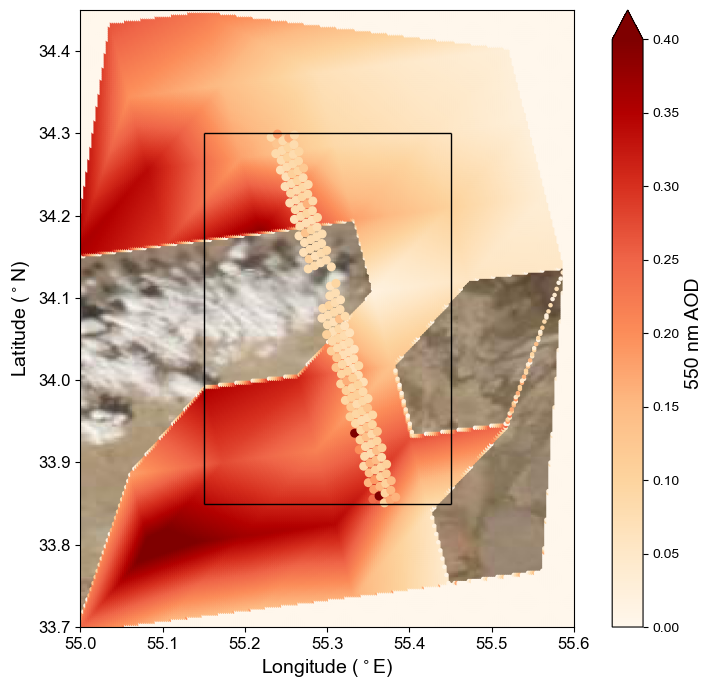

In [50]:
f, ax=plt.subplots(figsize=(8, 7))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
# ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
# ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
# mask = np.isnan(getattr(o1, 'rad_c3d')[:,:,-1])
# print(mask.sum())
c = ax.scatter(modis_lon, modis_lat,
               c=modis_aod, s=5,
               cmap='OrRd', vmin=0, vmax=0.4)

ax.scatter(df['lon'], df['lat'], 
               c=l2_aod, s=30,
               cmap='OrRd', vmin=0, vmax=0.4)
# ax.scatter(o1.lon2d[mask], o1.lat2d[mask], 
#                c='b', s=10,
#                cmap='Reds')
cbar = f.colorbar(c, ax=ax, extend='max')
cbar.set_label('550 nm AOD', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()
f.savefig('MODIS_AOD_20181018_with_OCO_AOD.png', dpi=300)

In [95]:
df.psur_retrieved/100

0      935.437202
1      939.955886
2      935.169638
3      935.954476
4      936.785215
          ...    
165    937.075419
166    937.422178
167    935.695184
168    934.222389
169    933.875880
Name: psur_retrieved, Length: 170, dtype: float64

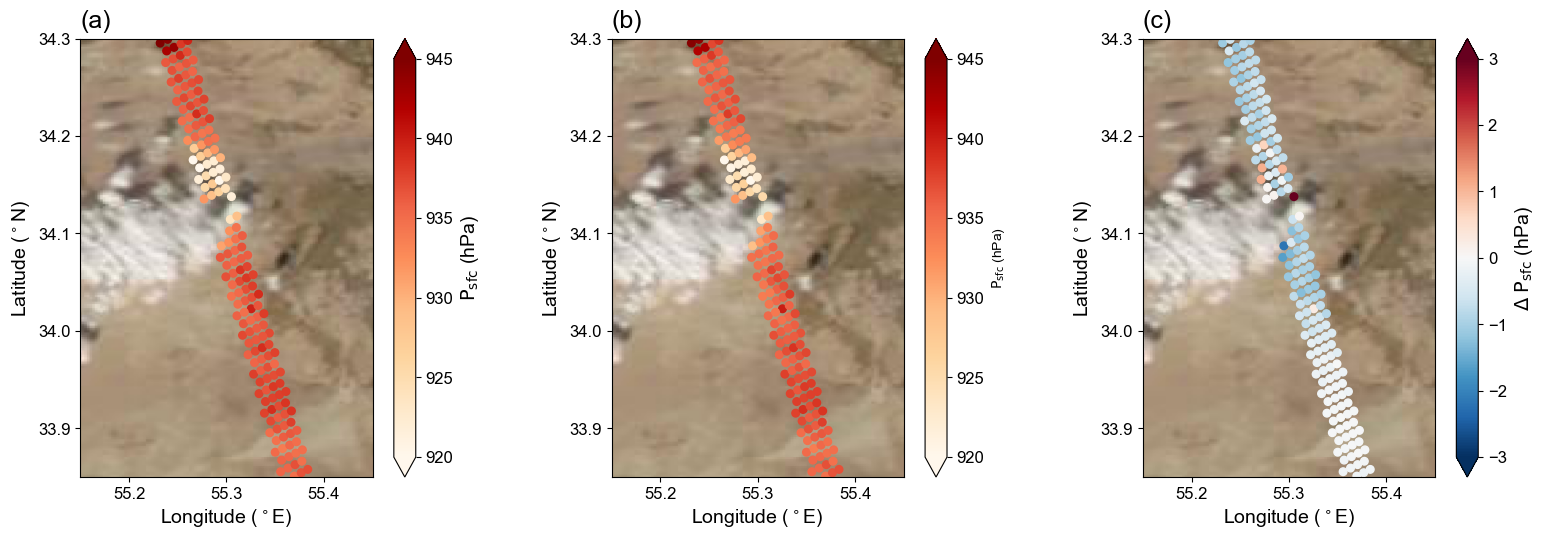

In [51]:
f, (ax1, ax2, ax3) =plt.subplots(1, 3, figsize=(16, 5.5))

img = png[0]
wesn= png[1]
img = mpimg.imread(img)
for ax in [ax1, ax2, ax3]:
    ax.imshow(img, extent=wesn)
    lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
    lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
    ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
    ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
    #ax.scatter(lon_2d[cth0>0], lat_2d[cth0>0], s=15, color='r')
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
    ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
    
#mask = data['xco2_retrieved'][...]!=-2
c1 = ax1.scatter(df['lon'], df['lat'], 
               c=df.psur_MT_file*10, s=30,
               cmap='OrRd', vmin=920, vmax=945)
cbar1 = f.colorbar(c1, ax=ax1, extend='both')
cbar1.set_label('$\mathrm{P_{sfc}}$ (hPa)', fontsize=label_size)
cbar1.ax.tick_params(labelsize=tick_size)

c2 = ax2.scatter(df['lon'], df['lat'], 
               c=df.psur_retrieved/100, s=30,
               cmap='OrRd', vmin=920, vmax=945)
cbar2 = f.colorbar(c2, ax=ax2, extend='both')
cbar2.set_label('$\mathrm{P_{sfc}}$ (hPa)',)# fontsize=label_size)
cbar2.ax.tick_params(labelsize=tick_size)

c3 = ax3.scatter(df['lon'], df['lat'],
               c=df.psur_retrieved/100-df.psur_MT_file*10, s=30,
               cmap='RdBu_r', vmin=-3, vmax=3)
cbar3 = f.colorbar(c3, ax=ax3, extend='both')
cbar3.set_label('$\Delta$ $\mathrm{P_{sfc}}$ (hPa)', fontsize=label_size)
cbar3.ax.tick_params(labelsize=tick_size)



xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(a)', fontsize=label_size+4, color='k')

xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(b)', fontsize=label_size+4, color='k')

xmin, xmax = ax3.get_xlim()
ymin, ymax = ax3.get_ylim()
ax3.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(c)', fontsize=label_size+4, color='k')



#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')

f.tight_layout()
f.savefig('MODIS_Psuf_retrieval_before_after_20181018.png', dpi=300)

In [61]:
index = 15
df['snd'][index]

2018101809322834

In [32]:
oco_l1b = h5py.File('/Users/yuch8913/programming/oco/simulation/data/oco/oco2_L1bScND_22850a_181018_B10003r_200409205805.h5', 'r')

In [33]:
oco_l1b.keys()

<KeysViewHDF5 ['Dimensions', 'FootprintGeometry', 'FrameConfiguration', 'FrameGeometry', 'FrameHeader', 'FrameTemperatures', 'InstrumentHeader', 'Metadata', 'RadianceClockingCorrection', 'Shapes', 'SliceMeasurements', 'SoundingGeometry', 'SoundingMeasurements', 'SpikeEOF']>

In [34]:
oco_id = oco_l1b['SoundingGeometry/sounding_id'][...]

In [59]:
index

array([7014])

In [60]:
df['snd']

0      2018101809322774
1      2018101809322775
2      2018101809322776
3      2018101809322777
4      2018101809322778
             ...       
165    2018101809322737
166    2018101809322738
167    2018101809322771
168    2018101809322772
169    2018101809322773
Name: snd, Length: 170, dtype: int64

In [69]:
for i in range(170):
    print(i)
    print(np.where(oco_id==df['snd'][i]))

0
(array([6187]), array([3]))
1
(array([6187]), array([4]))
2
(array([6187]), array([5]))
3
(array([6187]), array([6]))
4
(array([6187]), array([7]))
5
(array([6188]), array([0]))
6
(array([6188]), array([1]))
7
(array([6188]), array([2]))
8
(array([6188]), array([3]))
9
(array([6188]), array([4]))
10
(array([6188]), array([5]))
11
(array([6188]), array([6]))
12
(array([6188]), array([7]))
13
(array([6189]), array([1]))
14
(array([6189]), array([2]))
15
(array([6189]), array([3]))
16
(array([6189]), array([4]))
17
(array([6189]), array([5]))
18
(array([6189]), array([6]))
19
(array([6189]), array([7]))
20
(array([6190]), array([3]))
21
(array([6190]), array([4]))
22
(array([6190]), array([5]))
23
(array([6190]), array([6]))
24
(array([6190]), array([7]))
25
(array([6191]), array([0]))
26
(array([6191]), array([4]))
27
(array([6191]), array([5]))
28
(array([6191]), array([6]))
29
(array([6191]), array([7]))
30
(array([6192]), array([0]))
31
(array([6192]), array([1]))
32
(array([6192]),

In [86]:
o2a_rad = oco_l1b['SoundingMeasurements/radiance_o2'][...][6195, :]

In [87]:
o2a_rad.shape

(8, 1016)

In [88]:
dis = oco_l1b["InstrumentHeader/dispersion_coef_samp"][...]

In [89]:
lam = np.zeros([8,1016]) # Those are the wavelengths in the radiance file
wli = np.arange(1,1017,dtype=float)
for i in range(8): 
    for k in range(5):
        lam[i,:]=lam[i,:] + dis[0,i,k]*wli**k

In [90]:
def convert_photon_unit(data_photon, wavelength, scale_factor=2.0):
    # original: 
    # Ph sec^{-1} m^{-2} sr^{-1} um^{-1}
    
    c = 299792458.0
    h = 6.62607015e-34
    wavelength = wavelength * 1e-9
    data = data_photon/1000.0*c*h/wavelength*scale_factor

    return data

o2a_rad_convert = convert_photon_unit(o2a_rad[0], lam[1, :]*1e3)

In [91]:
o2a_rad_convert/0.35

array([0.23278112, 0.23447757, 0.2344664 , ..., 0.21813046, 0.22476952,
       0.22625061])

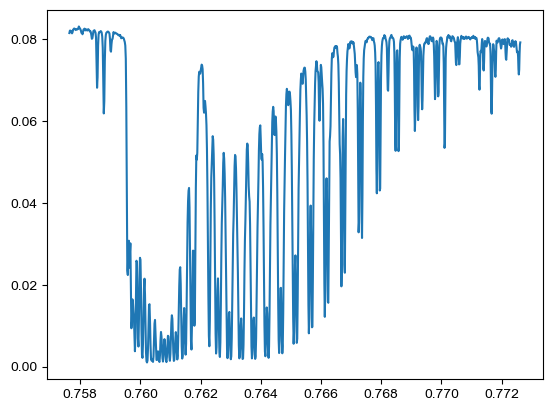

In [92]:
plt.plot(lam[5, :], o2a_rad_convert)

In [103]:
o2a_slope = df['o2a_slope'][50]
o2a_inter = df['o2a_inter'][50]

In [104]:
o2a_ref = df['rfl1'][50]
o2a_ref

0.2958895836124019

In [105]:
o2a_rad_unperturbed = o2a_rad_convert/(1+o2a_inter+o2a_slope*o2a_ref)

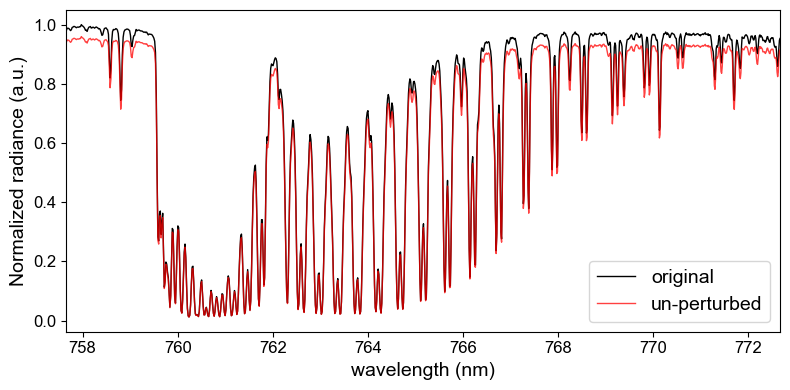

In [108]:
f, ax=plt.subplots(figsize=(8, 4))

rad_max = o2a_rad_convert.max()
ax.plot(lam[1, :]*1e3, o2a_rad_convert/rad_max, 'k', linewidth=1, label='original')
ax.plot(lam[1, :]*1e3, o2a_rad_unperturbed/rad_max, 'r', linewidth=1, label='un-perturbed', alpha=0.75)


ax.tick_params(axis='both', labelsize=tick_size)

ax.set_xlim(lam[1, :].min()*1e3, lam[1, :].max()*1e3)
ax.legend(fontsize=14, facecolor='white')
ax.set_xlabel('wavelength (nm)', fontsize=label_size)
ax.set_ylabel('Normalized radiance (a.u.)', fontsize=label_size)
f.tight_layout()
f.savefig('O2A_spectrum_before_after_unperturbation.png', dpi=300)

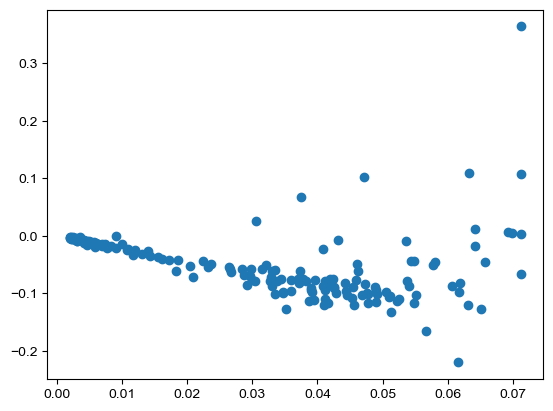

In [107]:
plt.scatter(df.o2a_slope, df.psur_retrieved/1000-df.psur_MT_file)

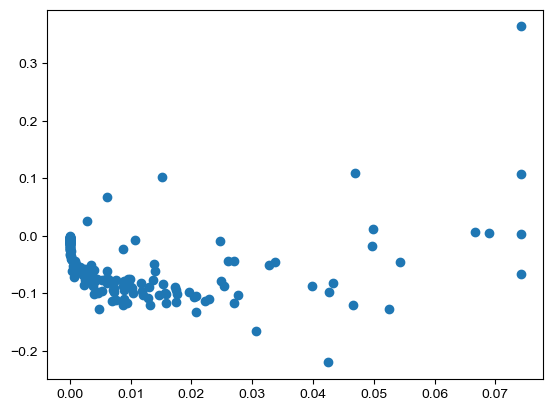

In [234]:
plt.scatter(df.o2a_inter, df.psur_retrieved/1000-df.psur_MT_file)

In [45]:
test = h5py.File('full-unperturbed20181018_test2_co2_profile.h5', 'r')

In [46]:
test.keys()

<KeysViewHDF5 ['aod', 'co2_profile', 'cpu_minutes', 'lat', 'lon', 'pert_o2', 'pert_sco2', 'pert_wco2', 'psur_MT_file', 'psur_retrieved', 'rfl1', 'rfl2', 'rfl3', 'snd', 'xco2_L2_file', 'xco2_retrieved', 'xco2_weighted_column']>

In [47]:
co2_prf = test['co2_profile'][...]*1e6
snd_co2 = test['snd'][...]
xco2_l2 = test['xco2_L2_file'][...]
xco2_unpert = test['xco2_retrieved'][...]
aod_unpert = test['aod'][...]

In [48]:
aod_unpert.shape

(170,)

In [49]:
oco_l2 = h5py.File('/Users/yuch8913/programming/oco/simulation/data/oco/oco2_L2StdND_22850a_181018_B10004r_200520201845.h5', 'r')

In [50]:
oco_l2_snd = oco_l2['RetrievalHeader/sounding_id'][...]
oco_l2_co2_prf = oco_l2['RetrievalResults/co2_profile'][...]
oco_l2_p_level = oco_l2['RetrievalResults/vector_pressure_levels'][...]
oco_l2_p_sfc = oco_l2['RetrievalResults/surface_pressure_fph'][...]
oco_l2_alt_level = oco_l2['RetrievalResults/vector_altitude_levels'][...]
oco_l2_avg_kernel = oco_l2['RetrievalResults/xco2_avg_kernel'][...]
oco_l2_o2a_ref = oco_l2['BRDFResults/brdf_reflectance_o2'][...]
oco_l2_wco2_ref = oco_l2['BRDFResults/brdf_reflectance_weak_co2'][...]
oco_l2_sco2_ref = oco_l2['BRDFResults/brdf_reflectance_strong_co2'][...]
oco_l2_aod = oco_l2['AerosolResults/aerosol_total_aod'][...]

In [51]:
l2_co2_profile = []
l2_p_level = []
l2_p_sfc = []
l2_alt_level = []
l2_avg_kernel = []
l2_o2a_ref = []
l2_wco2_ref = []
l2_sco2_ref = []
l2_aod = []
for snd in snd_co2:
    index = np.where(oco_l2_snd==snd)[0]
    l2_co2_profile.append(oco_l2_co2_prf[index, :][0]*1e6)
    l2_p_level.append(oco_l2_p_level[index, :][0])
    l2_p_sfc.append(oco_l2_p_sfc[index][0])
    l2_alt_level.append(oco_l2_alt_level[index, :][0])
    l2_avg_kernel.append(oco_l2_avg_kernel[index, :][0])
    l2_o2a_ref.append(oco_l2_o2a_ref[index][0])
    l2_wco2_ref.append(oco_l2_wco2_ref[index][0])
    l2_sco2_ref.append(oco_l2_sco2_ref[index][0])
    l2_aod.append(oco_l2_aod[index][0])

In [52]:
l2_co2_profile = np.array(l2_co2_profile)
l2_p_level = np.array(l2_p_level)
l2_p_sfc = np.array(l2_p_level)
l2_alt_level = np.array(l2_alt_level)
l2_avg_kernel = np.array(l2_avg_kernel)
l2_o2a_ref = np.array(l2_o2a_ref)
l2_wco2_ref = np.array(l2_wco2_ref)
l2_sco2_ref = np.array(l2_sco2_ref)
l2_aod = np.array(l2_aod)

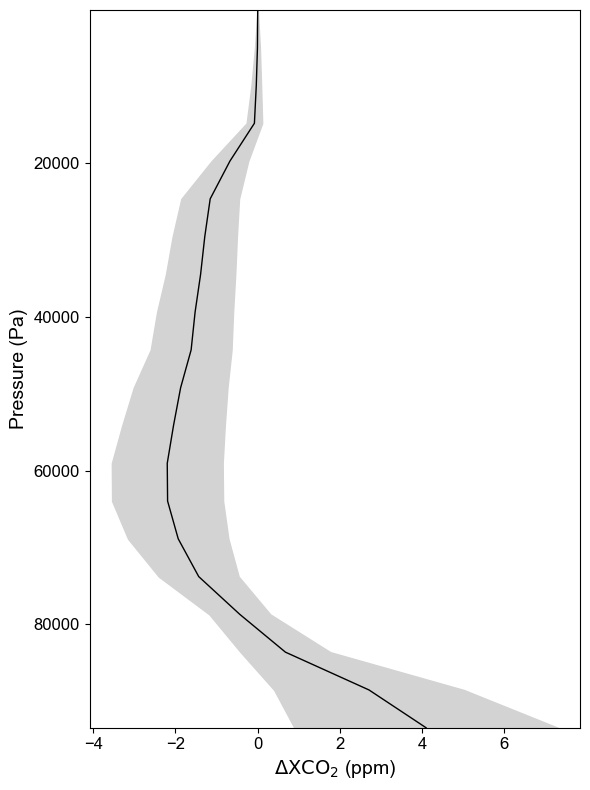

In [110]:
x = (co2_prf-l2_co2_profile).mean(axis=0)
x_std = (co2_prf-l2_co2_profile).std(axis=0)
y = l2_p_level.mean(axis=0)


f, ax=plt.subplots(figsize=(6, 8))

rad_max = o2a_rad_convert.max()
ax.plot(x, y, 'k', linewidth=1)
ax.fill_betweenx(y, x-x_std, x+x_std, color='lightgrey')


ax.tick_params(axis='both', labelsize=tick_size)

ax.set_ylim(y.max(), y.min())
#ax.legend(fontsize=14, facecolor='white')
ax.set_xlabel('$\Delta \mathrm{XCO_2}$ (ppm)', fontsize=label_size)
ax.set_ylabel('Pressure (Pa)', fontsize=label_size)
f.tight_layout()

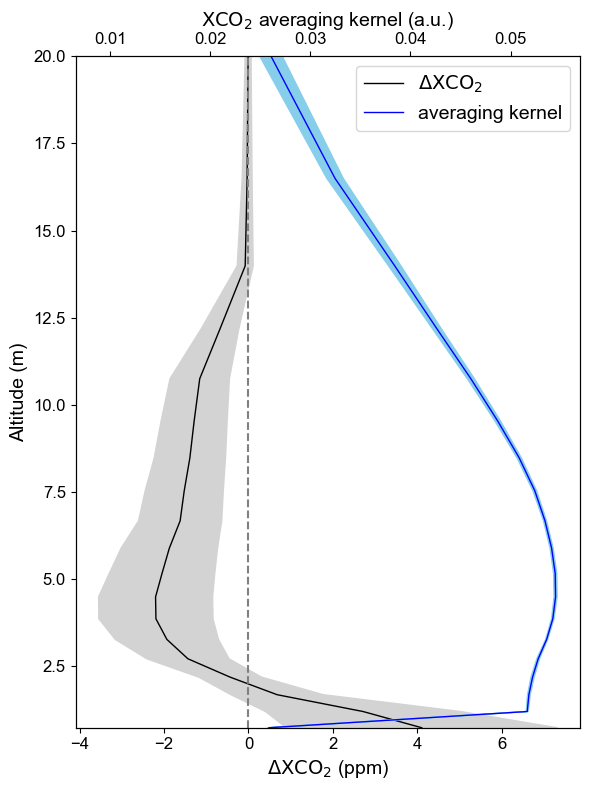

In [112]:
x = (co2_prf-l2_co2_profile).mean(axis=0)
x_std = (co2_prf-l2_co2_profile).std(axis=0)
y = l2_alt_level.mean(axis=0)/1000

x2 = l2_avg_kernel.mean(axis=0)
x2_std = l2_avg_kernel.std(axis=0)


f, ax1=plt.subplots(figsize=(6, 8))

# rad_max = o2a_rad_convert.max()
ln1 = ax1.plot(x, y, 'k', linewidth=1, label='$\Delta \mathrm{XCO_2}$')
ax1.fill_betweenx(y, x-x_std, x+x_std, color='lightgrey')

ax1.vlines(0, y.min(), 20, linestyle='--', colors='grey')

ax2 = ax1.twiny()
ln2 = ax2.plot(x2, y, 'blue', linewidth=1, label='averaging kernel')
ax2.fill_betweenx(y, x2-x2_std, x2+x2_std, color='skyblue')

# added these three lines
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, fontsize=legend_size)

for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.set_ylim(y.min(), 20)
    #ax.legend(fontsize=14, facecolor='white')

ax1.set_xlabel('$\Delta \mathrm{XCO_2}$ (ppm)', fontsize=label_size)    
ax1.set_ylabel('Altitude (m)', fontsize=label_size)
ax2.set_xlabel('$\mathrm{XCO_2}$ averaging kernel (a.u.)', fontsize=label_size)

f.tight_layout()
f.savefig('co2_retrieval_profile_avg_kernel')

In [52]:
co2_prf

array([[392.77738933, 397.76095083, 406.19311345, ..., 401.83911464,
        404.89364015, 408.89487246],
       [392.76974888, 397.63026446, 406.03736689, ..., 396.86798461,
        389.95974437, 387.30667956],
       [392.75374771, 397.66124447, 406.13969481, ..., 407.4329009 ,
        418.39621515, 427.43406557],
       ...,
       [392.76754082, 397.9215249 , 406.16564546, ..., 405.58078159,
        414.89589292, 422.94431314],
       [392.76675378, 397.78704673, 405.90029741, ..., 404.86605221,
        406.12580039, 408.93036843],
       [392.75476685, 397.64675867, 405.66173912, ..., 405.4454877 ,
        414.81529259, 423.24347474]])

In [53]:
l2_p_level

array([[9.3556910e+00, 4.9240479e+03, 9.8480957e+03, ..., 8.3708812e+04,
        8.8632867e+04, 9.3556914e+04],
       [9.3519592e+00, 4.9220840e+03, 9.8441680e+03, ..., 8.3675430e+04,
        8.8597516e+04, 9.3519602e+04],
       [9.3565025e+00, 4.9244751e+03, 9.8489502e+03, ..., 8.3716070e+04,
        8.8640555e+04, 9.3565023e+04],
       ...,
       [9.3715258e+00, 4.9323823e+03, 9.8647646e+03, ..., 8.3850492e+04,
        8.8782883e+04, 9.3715258e+04],
       [9.3617287e+00, 4.9272256e+03, 9.8544512e+03, ..., 8.3762836e+04,
        8.8690062e+04, 9.3617289e+04],
       [9.3945465e+00, 4.9444985e+03, 9.8889971e+03, ..., 8.4056469e+04,
        8.9000969e+04, 9.3945469e+04]], dtype=float32)

In [113]:
cld_xco2 = pd.read_csv('central_asia_2_footprint_cld_distance.csv')
xco2 = cld_xco2['L2XCO2[ppm]']
cld_dist = cld_xco2['cld_distance']
xco2_snd = cld_xco2['SND'].apply(lambda x: x[3:]).astype(int)

In [67]:
xco2_snd

0      2018101809322431
1      2018101809322471
2      2018101809322472
3      2018101809322473
4      2018101809322474
             ...       
165    2018101809323208
166    2018101809323236
167    2018101809323237
168    2018101809323238
169    2018101809323278
Name: SND, Length: 170, dtype: int64

In [53]:
snd_co2 = test['snd'][...]
xco2_l2 = test['xco2_L2_file'][...]
xco2_unpert = test['xco2_retrieved'][...]

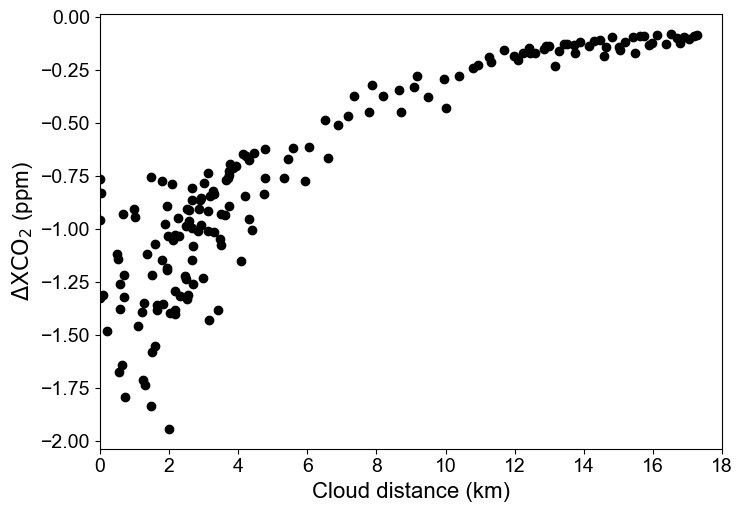

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharex=False)
fig.tight_layout(pad=5.0)
light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 16
legend_size = 16
tick_size = 14


x = cld_dist
y = xco2_unpert-xco2_l2

ax.scatter(x, y, color='k')

#ax.set_xticks(range(0, 160, 20))
ax.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = 0., 18.
#ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
#ax.text((xmin+(xmax-xmin)*0.05), (ymin+(ymax-ymin)*0.9), '(a)', fontsize=18)

#ax.legend(loc='center left', bbox_to_anchor=(0.65, 0.15), fontsize=legend_size)
ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
ax.set_ylabel('$\Delta \mathrm{XCO_2}$ (ppm)', fontsize=label_size)
# ax.set_title('title', fontsize=title_size)
plt.show()
fig.savefig('Delta_XCO2_cloud_distance_cld_parameterization.png', dpi=300)

404.06574117647057


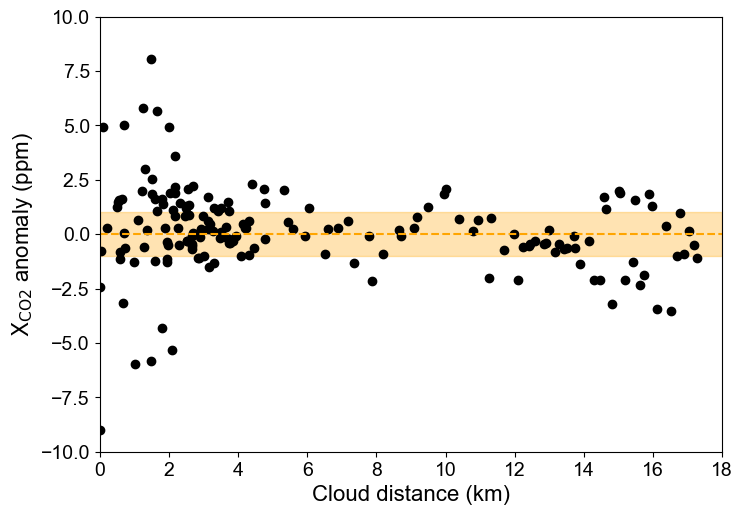

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharex=False)
fig.tight_layout(pad=5.0)
light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 16
legend_size = 16
tick_size = 14


x = cld_dist
y = xco2_l2-404#np.mean(xco2_l2[xco2_l2>10])

print(np.mean(xco2_l2[xco2_l2>10]))
ax.hlines(0, 0, 18, linestyle='--', color='orange')
ax.fill_between([0, 18], -1, 1, color='orange', alpha=0.3)
ax.scatter(x, y, color='k')

#ax.set_xticks(range(0, 160, 20))
ax.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ymin, ymax = -10., 10.
xmin, xmax = 0., 18.
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
#ax.text((xmin+(xmax-xmin)*0.05), (ymin+(ymax-ymin)*0.9), '(a)', fontsize=18)

#ax.legend(loc='center left', bbox_to_anchor=(0.65, 0.15), fontsize=legend_size)
ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
ax.set_ylabel('$\mathrm{X_{CO2}}$ anomaly (ppm)', fontsize=label_size)
# ax.set_title('title', fontsize=title_size)
plt.show()
# fig.savefig('Delta_XCO2_cloud_distance_cld_parameterization.png', dpi=300)

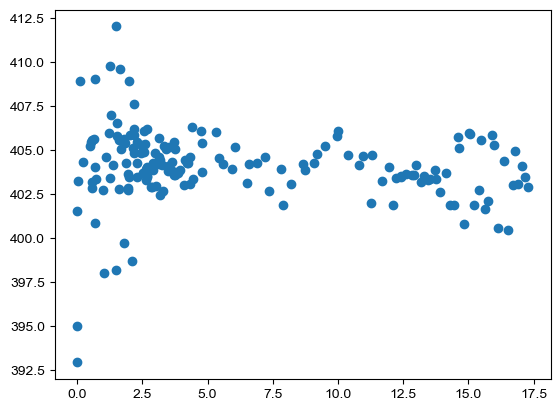

In [54]:
plt.scatter(cld_dist, xco2)
# plt.ylim(400, 415)

(400.0, 415.0)

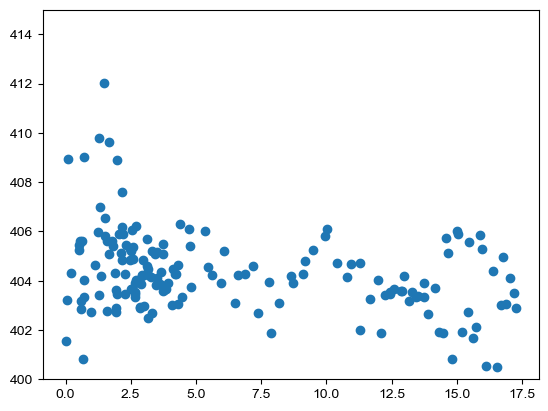

In [14]:
plt.scatter(cld_dist, xco2)
plt.ylim(400, 415)

0


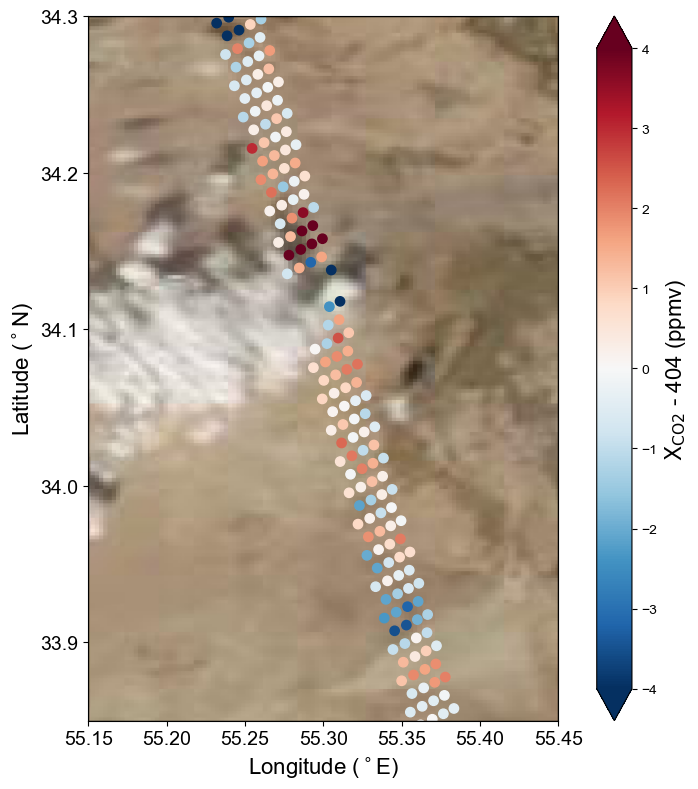

In [85]:
f, ax=plt.subplots(figsize=(8, 8))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
ax.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
mask = np.isnan(getattr(o1, 'rad_c3d')[:,:,-1])
print(mask.sum())
c = ax.scatter(o1.lon, o1.lat, 
               c=getattr(o1, 'co2')*1e6-404, s=45,
               cmap='RdBu_r', vmin=-4, vmax=4)

cbar = f.colorbar(c, ax=ax, extend='both')
cbar.set_label('$\mathrm{X_{CO2}}$ - 404 (ppmv)', fontsize=label_size)
ax.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
f.tight_layout()

In [116]:
import cartopy.crs as ccrs
import cartopy.feature as cf  
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.img_tiles as cimgt
from urllib.request import urlopen, Request
import io
from PIL import Image

def new_get_image(self, tile):
    url = self._image_url(tile) 
    req = Request(url)
    req.add_header('User-agent', 'your bot 0.1')
    fh = urlopen(req)
    im_data = io.BytesIO(fh.read())
    fh.close()
    img = Image.open(im_data)
    img = img.convert(self.desired_tile_form)
    return img, self.tileextent(tile), 'lower'

cimgt.GoogleWTS.get_image = new_get_image
osm_img = cimgt.GoogleTiles(style='satellite')
osm_img_street = cimgt.GoogleTiles(style='street')

0


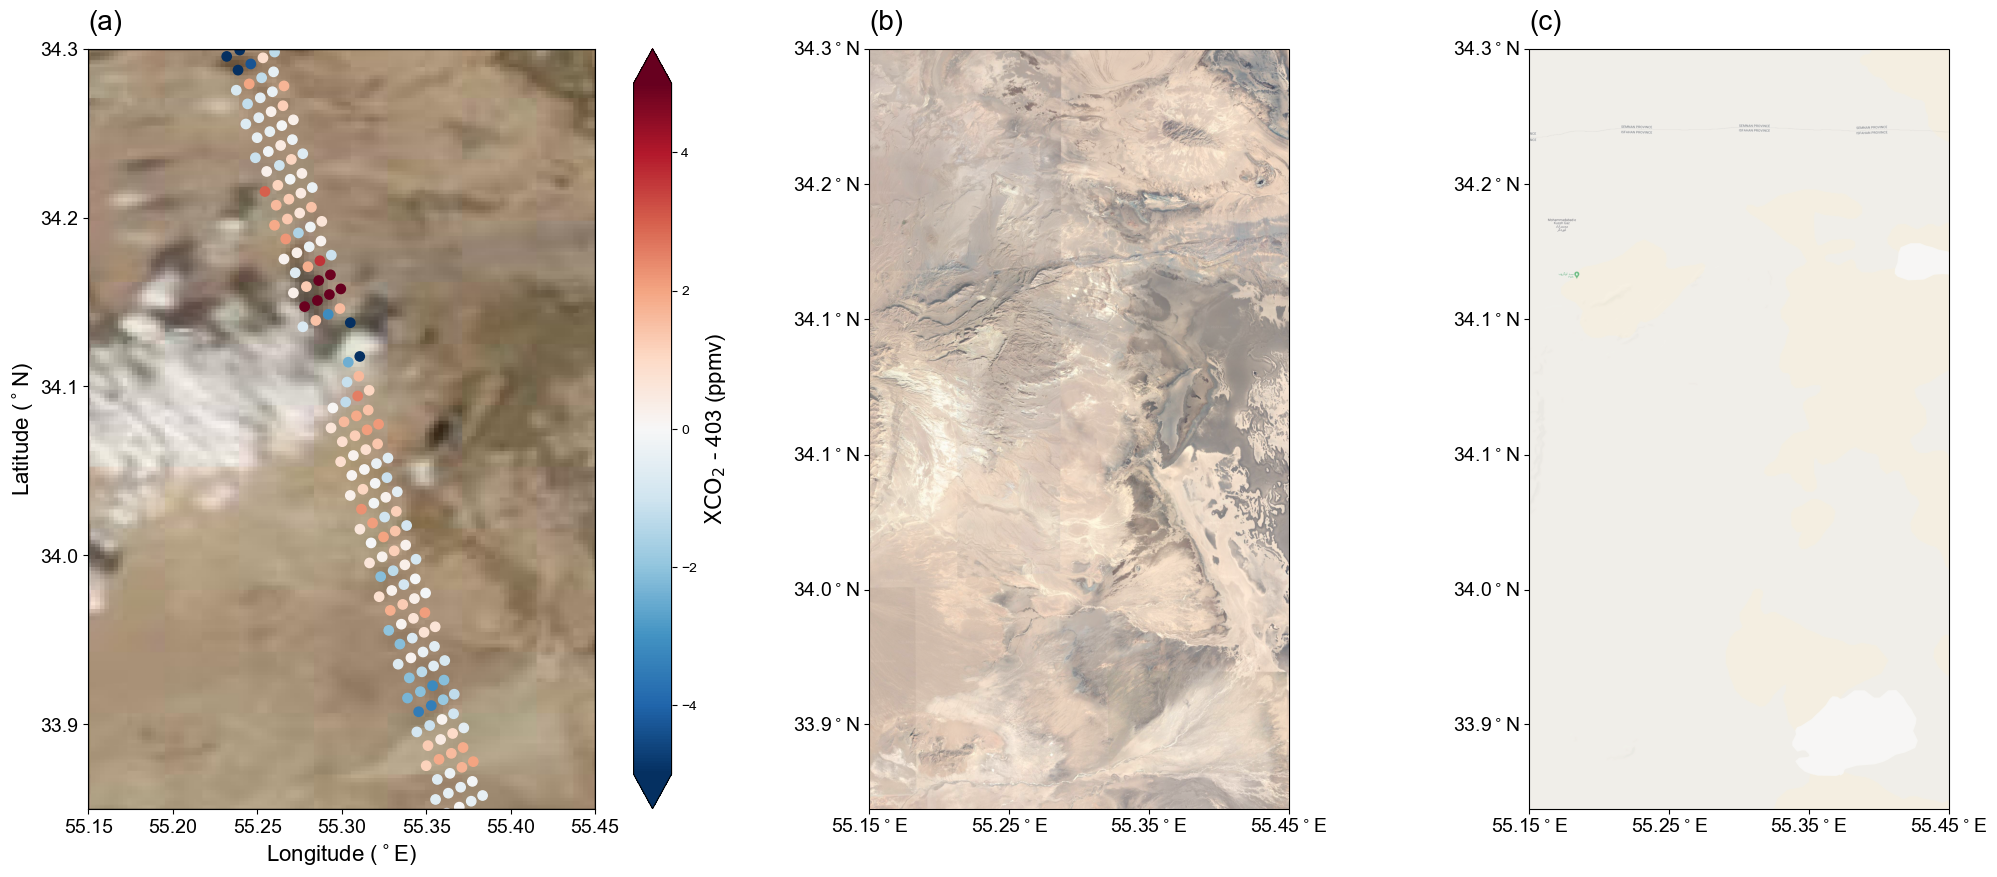

In [118]:
fig = plt.figure(figsize=(22, 8)) # open matplotlib figure

png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]

ax2 = fig.add_axes([0.05, 0.05, 0.35, 0.95])
ax1 = fig.add_axes([0.40, 0.05, 0.3, 0.95], projection=osm_img.crs)
ax12 = fig.add_axes([0.70, 0.05, 0.3, 0.95], projection=osm_img_street.crs)

#ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
center_pt = [np.mean(lat_dom), 
             np.mean(lon_dom)] # lat/lon of One World Trade Center in NYC
zoom = 0.0425 # for zooming out of center point
extent = [center_pt[1]-(zoom*2.0),center_pt[1]+(zoom*2.0),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
extent = lon_dom+lat_dom#[-105.273, -105.257, 40.002, 40.01]
ax1.set_extent(extent) # set extents
ax1.set_xticks(np.linspace(55.15, 55.45, 4),crs=ccrs.PlateCarree()) # set longitude indicators
ax1.set_yticks(np.linspace(33.9, 34.3,6),crs=ccrs.PlateCarree()) # set latitude indicatorslon_formatter = LongitudeFormatter(number_format='0.3f',degree_symbol='',dateline_direction_label=True) # format lons
lon_formatter = LongitudeFormatter(number_format='0.2f', degree_symbol='$^\circ$', dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.1f', degree_symbol='$^\circ$') # format lats
ax1.xaxis.set_major_formatter(lon_formatter) # set lons
ax1.yaxis.set_major_formatter(lat_formatter) # set lats
ax1.tick_params(axis='both', labelsize=tick_size)
scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale), alpha=0.75) # add OSM with zoom specification
# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings

#val = ax1.scatter(data.lon, data.lat, c=data.NO2_dSCD, cmap='rainbow', 
#                  s=75, 
#                  edgecolor='k',
#                  transform=ccrs.PlateCarree())

# Create new axes according to image position
#cax = fig.add_axes([ax1.get_position().x1+0.05,
#                    ax1.get_position().y0,
#                    0.02,
#                    ax1.get_position().height,])
#cbar = fig.colorbar(val, cax=cax)
#cax.tick_params(labelsize=18)
#cbar.set_label('RMS-filtered $\mathrm{NO_2}$ dSCD (molec. $\mathrm{cm^{-2}}$)', fontsize=20)
# set title
#ax1.set_title(title, fontsize=22)

ax12.set_extent(extent) # set extents
ax12.set_xticks(np.linspace(55.15, 55.45, 4),crs=ccrs.PlateCarree()) # set longitude indicators
ax12.set_yticks(np.linspace(33.9, 34.3,6),crs=ccrs.PlateCarree()) # set latitude indicatorslon_formatter = LongitudeFormatter(number_format='0.3f',degree_symbol='',dateline_direction_label=True) # format lons
lon_formatter = LongitudeFormatter(number_format='0.2f', degree_symbol='$^\circ$', dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.1f', degree_symbol='$^\circ$') # format lats
ax12.xaxis.set_major_formatter(lon_formatter) # set lons
ax12.yaxis.set_major_formatter(lat_formatter) # set lats
ax12.tick_params(axis='both', labelsize=tick_size)
scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax12.add_image(osm_img_street, int(scale), alpha=0.75) # add OSM with zoom specification



img = mpimg.imread(img)
ax2.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
ax2.set_xlim(np.min(lon_dom), np.max(lon_dom))
ax2.set_ylim(np.min(lat_dom), np.max(lat_dom))
ax2.vlines(lon_dom, ymin=wesn[2]+0.15, ymax=wesn[3]-0.15, color='k', linewidth=1)
ax2.hlines(lat_dom, xmin=wesn[0]+0.15, xmax=wesn[1]-0.15, color='k', linewidth=1)
mask = np.isnan(getattr(o1, 'rad_c3d')[:,:,-1])
print(mask.sum())
c = ax2.scatter(o1.lon, o1.lat, 
               c=getattr(o1, 'co2')*1e6-404, s=45,
               cmap='RdBu_r', vmin=-5, vmax=5)

cbar = f.colorbar(c, ax=ax2, extend='both')
cbar.set_label('$\mathrm{XCO_2}$ - 403 (ppmv)', fontsize=label_size)
ax2.tick_params(axis='both', labelsize=tick_size)
#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')
ax2.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
ax2.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)


xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(b)', fontsize=label_size+4, color='k')

xmin, xmax = ax12.get_xlim()
ymin, ymax = ax12.get_ylim()
ax12.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(c)', fontsize=label_size+4, color='k')

xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(a)', fontsize=label_size+4, color='k')

plt.show() # show the plot
fig.savefig('MODIS_20181018_vs_google_maps.png', dpi=300)

In [119]:
import xarray as xr



[55.15, 55.45] [33.85, 34.300000000000004]
[4.32, 4.77] [51.1, 51.660000000000004]
[11.42, 11.959999999999999] [44.6, 45.35]


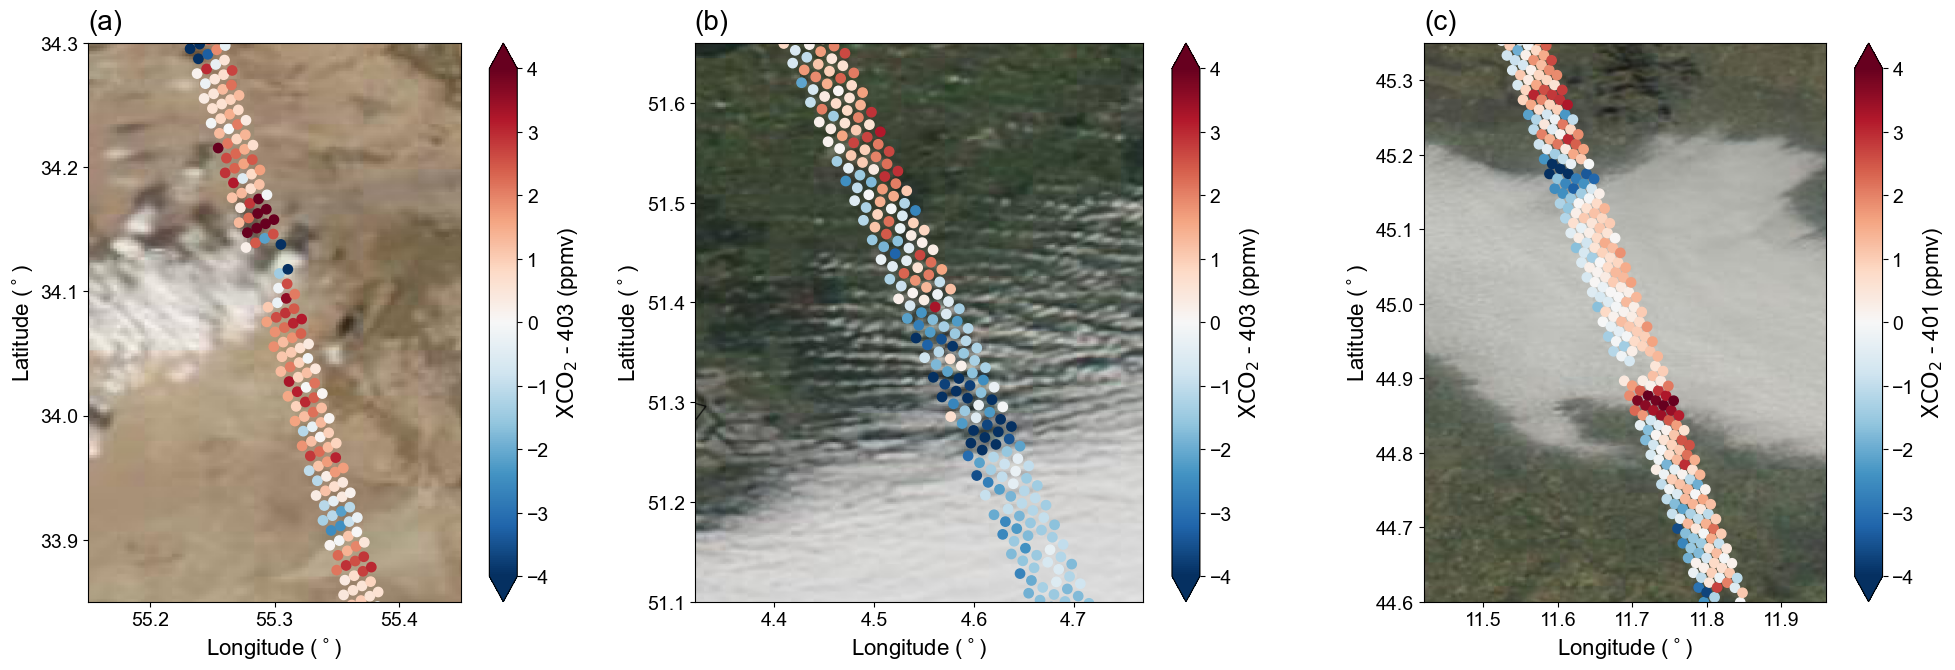

In [120]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(24*0.85, 8*0.85))


png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
with open(f'20181018_central_asia_2_470cloud_test2_o2a.pkl', 'rb') as file:
    o_ax1 = pickle.load(file)

img = mpimg.imread(img)
ax1.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
ax1.set_xlim(np.min(lon_dom), np.max(lon_dom))
ax1.set_ylim(np.min(lat_dom), np.max(lat_dom))
print(lon_dom, lat_dom)

c1 = ax1.scatter(o_ax1.lon, o_ax1.lat, 
               c=getattr(o_ax1, 'co2')*1e6-403, s=45,
               cmap='RdBu_r', vmin=-4, vmax=4)

cbar1 = f.colorbar(c1, ax=ax1, extend='both')
cbar1.set_label('$\mathrm{XCO_2}$ - 403 (ppmv)', fontsize=label_size)


png       = ['../simulation/data/20161023_north_france_test_20161023/aqua_rgb_2016-10-23_4.17-4.92-50.95-51.81.png',
         [4.17, 4.92, 50.95, 51.81]]
img = png[0]
wesn= png[1]
with open(f'20161023_north_france_test_o2a.pkl', 'rb') as file:
    o_ax2 = pickle.load(file)
    
img = mpimg.imread(img)
ax2.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
print(lon_dom, lat_dom)
ax2.set_xlim(np.min(lon_dom), np.max(lon_dom))
ax2.set_ylim(np.min(lat_dom), np.max(lat_dom))

c2 = ax2.scatter(o_ax2.lon, o_ax2.lat, 
               c=getattr(o_ax2, 'co2')*1e6-403, s=45,
               cmap='RdBu_r', vmin=-4, vmax=4)

cbar2 = f.colorbar(c2, ax=ax2, extend='both')
cbar2.set_label('$\mathrm{XCO_2}$ - 403 (ppmv)', fontsize=label_size)

    
    
png       = ['../simulation/data/20151219_north_italy_470cloud_test_20151219/aqua_rgb_2015-12-19_11.27-12.11-44.45-45.50.png',
         [11.27, 12.11, 44.45, 45.50]]
img = png[0]
wesn= png[1]
with open(f'20151219_north_italy_470cloud_test_o2a.pkl', 'rb') as file:
    o_ax3 = pickle.load(file)
with xr.open_dataset(f'../simulation/data/oco/oco2_LtCO2_151219_B10206Ar_200730213244s.nc4') as file:
    qf = file['xco2_quality_flag']
    snd = file['sounding_id']
qf_array = np.empty_like(getattr(o_ax3, 'co2'))
qf_array[...] = np.nan
for i in range(qf_array.shape[0]):
    for j in range(qf_array.shape[1]):
        ind = np.where(snd == o_ax3.snd[i, j])[0]
        if len(ind)>0:
            qf_array[i, j] = qf[ind]
img = mpimg.imread(img)
ax3.imshow(img, extent=wesn)
lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
print(lon_dom, lat_dom)
ax3.set_xlim(np.min(lon_dom), np.max(lon_dom))
ax3.set_ylim(np.min(lat_dom), np.max(lat_dom))
mask = ~np.isnan(qf_array)
#mask = qf_array==1
c3 = ax3.scatter(o_ax3.lon[mask], o_ax3.lat[mask], 
               c=getattr(o_ax3, 'co2')[mask]*1e6-401, s=45,
               cmap='RdBu_r', vmin=-4, vmax=4)

cbar3 = f.colorbar(c3, ax=ax3, extend='both')
cbar3.set_label('$\mathrm{XCO_2}$ - 401 (ppmv)', fontsize=label_size)

for i in range(3):
    ax = [ax1, ax2, ax3][i]
    fig_label = ['(a)', '(b)', '(c)'][i]
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.set_xlabel('Longitude ($^\circ$)', fontsize=label_size)
    ax.set_ylabel('Latitude ($^\circ$)', fontsize=label_size)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), fig_label, fontsize=label_size+4, color='k')

for cbar in [cbar1, cbar2, cbar3]:
    cbar.ax.tick_params(labelsize=tick_size)


f.tight_layout()
f.savefig('MODIS_OCO_cloud_effect_example.png', dpi=300)

In [14]:
toa = o1.toa
mu = o1.mu
sl_np = o1.sl_5
sls_np = o1.sls_5
c3d_np = o1.rad_c3d_5
clr_np = o1.rad_clr_5
fp, z = 3, 55
points = 11

w=1./sls_np[z,fp,:] 

x=c3d_np[z,fp,:]/(toa[:]*mu)*np.pi

x_len = len(x)
mask = np.argsort(x)[x_len-points:]
res=np.polyfit(x[mask], sl_np[z,fp,:][mask], 1, w=w[mask], cov=True) # now get covariance as well!
slope,intercept=res[0]
slopestd=np.sqrt(res[1][0][0])
interceptstd=np.sqrt(res[1][1][1])

In [122]:
res

(array([-0.00789814,  0.00892277]),
 array([[ 9.38522974e-04, -2.27952602e-04],
        [-2.27952602e-04,  6.31461032e-05]]))

In [9]:
def func(x, a, b):
    """The fitting function"""
    return a*(np.array(x))+b

popt, pcov = curve_fit(func, x[mask], sl_np[z,fp,:][mask])

In [235]:
sls_np.shape

(242, 302, 11)

In [10]:
import uncertainties.unumpy as unp
import uncertainties as unc

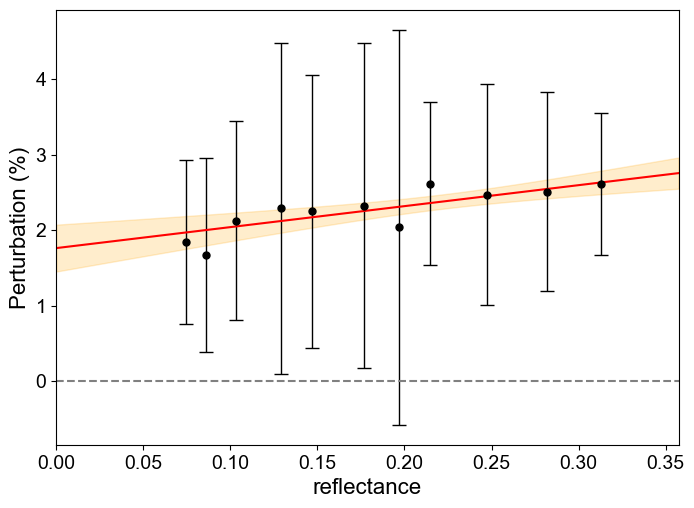

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharex=False)
fig.tight_layout(pad=5.0)
light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 16
legend_size = 16
tick_size = 14


toa = o1.toa
mu = o1.mu
sl_np = o1.sl_5
sls_np = o1.sls_5
c3d_np = o1.rad_c3d_5
clr_np = o1.rad_clr_5
fp, z = 160, 130#159, 181
points = 11

w=1./sls_np[z,fp,:] 

x=c3d_np[z,fp,:]/(toa[:]*mu)*np.pi

x_len = len(x)
mask = np.argsort(x)[x_len-points:]
res=np.polyfit(x[mask], sl_np[z,fp,:][mask], 1, w=w[mask], cov=True) # now get covariance as well!
slope,intercept=res[0]
slopes=np.sqrt(res[1][0][0])
intercepts=np.sqrt(res[1][1][1])



ax.errorbar(x[mask], sl_np[z,fp,:][mask]*100, yerr=sls_np[z,fp,:]*100, color='k',
            ecolor='k',
            elinewidth=1,
            capsize=5,
            linewidth=0,
            marker='o', ms=5)
yy=intercept+slope*x
y1=intercept+intercepts+(slope+slopes)*x
y2=intercept-intercepts+(slope-slopes)*x
# ax.plot(x,yy*100,'r-',linewidth=2)  
# ax.plot(x,y1*100,'r:',linewidth=1)  
# ax.plot(x,y2*100,'r:',linewidth=1) 

# ax.plot(x, (x*slope+intercept)*100, 'purple', label='prediction')


#ax.set_xticks(range(0, 160, 20))
ax.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = 0., xmax*1.1
#ax.set_ylim(ymin, ymax)
ax.set_xlim(0, xmax)
# ax.text((xmin+(xmax-xmin)*0.05), (ymin+(ymax-ymin)*0.9), '(a)', fontsize=18)

# ax.legend(loc='center left', bbox_to_anchor=(0.65, 0.15), fontsize=legend_size)
ax.set_xlabel('reflectance', fontsize=label_size)
ax.set_ylabel('Perturbation (%)', fontsize=label_size)


popt, pcov = res[0], res[1]
# calculate parameter confidence interval
a, b = unc.correlated_values(popt, pcov)
px = np.linspace(0, xmax, num=50, endpoint=True) 
py = a*px+b
nom = unp.nominal_values(py)*100
std = unp.std_devs(py)*100
# plot the regression line and uncertainty band (95% confidence)
ax.plot(px, nom, c='r')
ax.fill_between(px, nom - 1.96 * std, nom + 1.96 * std, color='orange', alpha=0.2)
ax.hlines(0, xmin, xmax, linestyle='--', colors='grey')


plt.show()



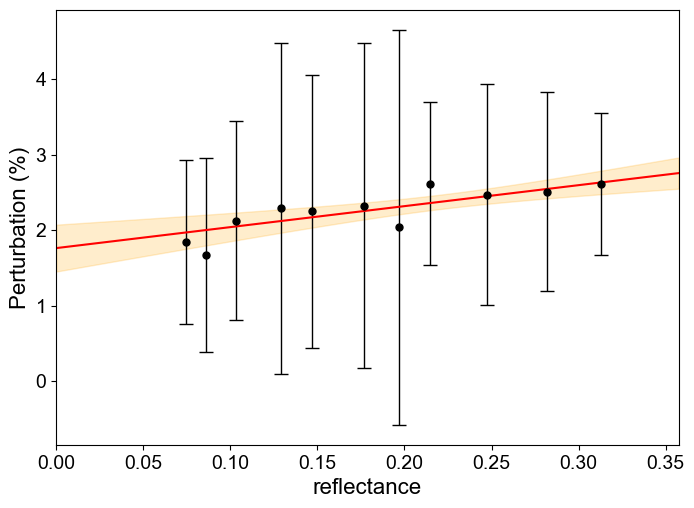

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharex=False)
fig.tight_layout(pad=5.0)
light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 16
legend_size = 16
tick_size = 14


toa = o1.toa
mu = o1.mu
sl_np = o1.sl_5
sls_np = o1.sls_5
c3d_np = o1.rad_c3d_5
clr_np = o1.rad_clr_5
fp, z = 160, 130
points = 11

w=1./sls_np[z,fp,:] 

x=c3d_np[z,fp,:]/(toa[:]*mu)*np.pi

x_len = len(x)
mask = np.argsort(x)[x_len-points:]
res=np.polyfit(x[mask], sl_np[z,fp,:][mask], 1, w=w[mask], cov=True) # now get covariance as well!
slope,intercept=res[0]
slopes=np.sqrt(res[1][0][0])
intercepts=np.sqrt(res[1][1][1])



ax.errorbar(x[mask], sl_np[z,fp,:][mask]*100, yerr=sls_np[z,fp,:]*100, color='k',
            ecolor='k',
            elinewidth=1,
            capsize=5,
            linewidth=0,
            marker='o', ms=5)
yy=intercept+slope*x
y1=intercept+intercepts+(slope+slopes)*x
y2=intercept-intercepts+(slope-slopes)*x
# ax.plot(x,yy*100,'r-',linewidth=2)  
# ax.plot(x,y1*100,'r:',linewidth=1)  
# ax.plot(x,y2*100,'r:',linewidth=1) 

# ax.plot(x, (x*slope+intercept)*100, 'purple', label='prediction')


#ax.set_xticks(range(0, 160, 20))
ax.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = 0., xmax*1.1
#ax.set_ylim(ymin, ymax)
ax.set_xlim(0, xmax)
# ax.text((xmin+(xmax-xmin)*0.05), (ymin+(ymax-ymin)*0.9), '(a)', fontsize=18)

# ax.legend(loc='center left', bbox_to_anchor=(0.65, 0.15), fontsize=legend_size)
ax.set_xlabel('reflectance', fontsize=label_size)
ax.set_ylabel('Perturbation (%)', fontsize=label_size)


popt, pcov = res[0], res[1]
# calculate parameter confidence interval
a, b = unc.correlated_values(popt, pcov)
px = np.linspace(0, xmax, num=50, endpoint=True) 
py = a*px+b
nom = unp.nominal_values(py)*100
std = unp.std_devs(py)*100
# plot the regression line and uncertainty band (95% confidence)
ax.plot(px, nom, c='r')
ax.fill_between(px, nom - 1.96 * std, nom + 1.96 * std, color='orange', alpha=0.2)


plt.show()


In [241]:
slopes

0.008725918804403175

In [239]:
a

0.020981878038257788+/-0.008725918804403173

In [135]:
with h5py.File(f'../simulation/data/20181018_central_asia_2_470cloud_test2_20181018/atm_abs_o2a_11.h5', 'r') as file:
    print(file.keys())
    wvl = file['wl_oco'][...]
    trnsx = file['trns_oco'][...]
    oco_lam = file['lamx'][...]
    oco_tx = file['tx'][...]

refl = 0.288

<KeysViewHDF5 ['absgl', 'absgn', 'absgx', 'absgy', 'atm_dz', 'atm_p', 'atm_pi', 'atm_temp', 'atm_zgrd', 'ils0', 'lamx', 'lay', 'solx', 'trns_oco', 'tx', 'unit_T', 'unit_abs', 'unit_l', 'unit_p', 'unit_z', 'wl_oco']>


In [136]:
from matplotlib import cm, colors

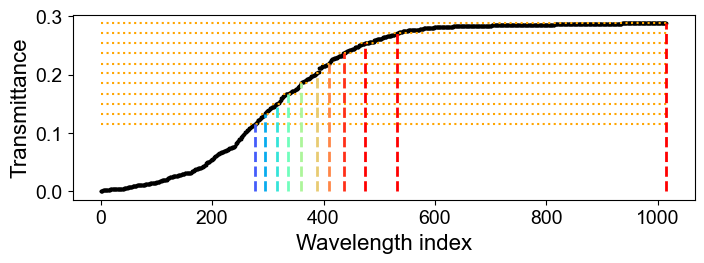

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3.5), sharex=False)
fig.tight_layout(pad=5.0)
title_size = 18
label_size = 16
legend_size = 16
tick_size = 14
x = np.arange(1016)
sx = np.argsort(trnsx)
y = trnsx[sx]*refl
ax.scatter(x, y, color='k', s=3)

ax.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.set_xlabel('Wavelength index', fontsize=label_size)
ax.set_ylabel('Transmittance', fontsize=label_size)



# plot setting
norm = colors.Normalize(vmin=0.0, vmax=255.0, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.rainbow)
for i in range(11):
    wli0 = np.where(sx==np.argmin(np.abs(y-oco_tx[i])))[0][0]

    ax.plot([0,1016],[oco_tx[i],oco_tx[i]],color='orange',linestyle='dotted')
    cl = 30*(i+1)
    if cl == 0: 
        cl=255
    ax.plot([sx[wli0], sx[wli0]], [0,oco_tx[i]], linestyle='dashed', color=mapper.to_rgba(cl), linewidth=2)

In [138]:
np.argmin(np.abs(trnsx-oco_tx[0]))

319

In [291]:
sx

array([ 176,  190,  151, ..., 1009, 1011, 1010])

In [294]:
np.where(sx==319)[0][0]

163

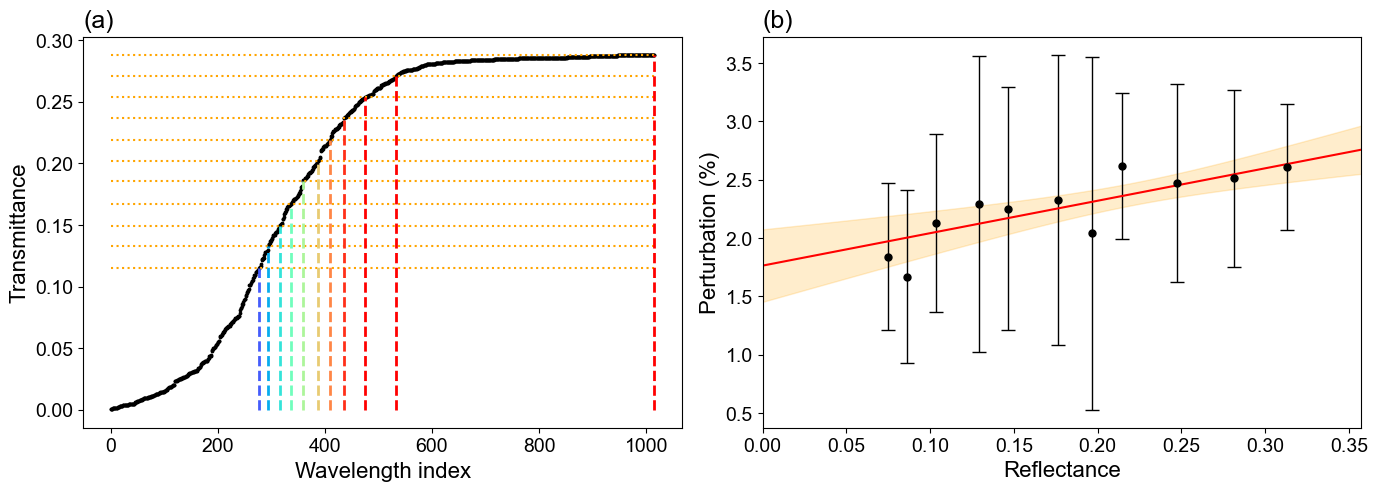

In [140]:
f, (ax1, ax) =plt.subplots(1, 2, figsize=(14, 5))
f.tight_layout(pad=3.0)

title_size = 18
label_size = 16
legend_size = 16
tick_size = 14

# first fig
x = np.arange(1016)
sx = np.argsort(trnsx)
y = trnsx[sx]*refl
ax1.scatter(x, y, color='k', s=3)

ax1.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax1.set_xlabel('Wavelength index', fontsize=label_size)
ax1.set_ylabel('Transmittance', fontsize=label_size)



# plot setting
norm = colors.Normalize(vmin=0.0, vmax=255.0, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.rainbow)
for i in range(11):
    wli0 = np.where(sx==np.argmin(np.abs(y-oco_tx[i])))[0][0]

    ax1.plot([0,1016],[oco_tx[i],oco_tx[i]],color='orange',linestyle='dotted')
    cl = 30*(i+1)
    if cl == 0: 
        cl=255
    ax1.plot([sx[wli0], sx[wli0]], [0,oco_tx[i]], linestyle='dashed', color=mapper.to_rgba(cl), linewidth=2)


# second fig
toa = o1.toa
mu = o1.mu
sl_np = o1.sl_5
sls_np = o1.sls_5/np.sqrt(3)
c3d_np = o1.rad_c3d_5
clr_np = o1.rad_clr_5
fp, z = 160, 130
points = 11

w=1./sls_np[z,fp,:] 

x=c3d_np[z,fp,:]/(toa[:]*mu)*np.pi

x_len = len(x)
mask = np.argsort(x)[x_len-points:]
res=np.polyfit(x[mask], sl_np[z,fp,:][mask], 1, w=w[mask], cov=True) # now get covariance as well!
slope,intercept=res[0]
slopes=np.sqrt(res[1][0][0])
intercepts=np.sqrt(res[1][1][1])



ax.errorbar(x[mask], sl_np[z,fp,:][mask]*100, yerr=sls_np[z,fp,:]*100, color='k',
            ecolor='k',
            elinewidth=1,
            capsize=5,
            linewidth=0,
            marker='o', ms=5)
yy=intercept+slope*x
y1=intercept+intercepts+(slope+slopes)*x
y2=intercept-intercepts+(slope-slopes)*x
# ax.plot(x,yy*100,'r-',linewidth=2)  
# ax.plot(x,y1*100,'r:',linewidth=1)  
# ax.plot(x,y2*100,'r:',linewidth=1) 

# ax.plot(x, (x*slope+intercept)*100, 'purple', label='prediction')


#ax.set_xticks(range(0, 160, 20))
ax.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = 0., xmax*1.1
#ax.set_ylim(ymin, ymax)
ax.set_xlim(0, xmax)
# ax.text((xmin+(xmax-xmin)*0.05), (ymin+(ymax-ymin)*0.9), '(a)', fontsize=18)

# ax.legend(loc='center left', bbox_to_anchor=(0.65, 0.15), fontsize=legend_size)
ax.set_xlabel('Reflectance', fontsize=label_size)
ax.set_ylabel('Perturbation (%)', fontsize=label_size)


popt, pcov = res[0], res[1]
# calculate parameter confidence interval
a, b = unc.correlated_values(popt, pcov)
px = np.linspace(0, xmax, num=50, endpoint=True) 
py = a*px+b
nom = unp.nominal_values(py)*100
std = unp.std_devs(py)*100
# plot the regression line and uncertainty band (95% confidence)
ax.plot(px, nom, c='r')
ax.fill_between(px, nom - 1.96 * std, nom + 1.96 * std, color='orange', alpha=0.2)





xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(a)', fontsize=label_size+2, color='k')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(b)', fontsize=label_size+2, color='k')



#f.tight_layout()
f.savefig('wavelength_select_and_slope_inter_derive.png', dpi=300)

In [39]:

data_25p = h5py.File('full-unperturbed20181018_central_asia_2_test_25p_1.h5', 'r')


data2_25p = h5py.File('full-unperturbed20181018_central_asia_2_test_25p_2.h5', 'r')

mask = data_25p['xco2_retrieved'][...]!=-2

key_list = ['aod', 'cpu_minutes', 'lat', 'lon', 'psur_MT_file', 'psur_retrieved',
            'rfl1', 'rfl2', 'rfl3', 'snd', 'xco2_L2_file', 'xco2_retrieved', 'xco2_weighted_column']
df1_25p = pd.DataFrame({key:data_25p[key][...] for key in key_list})
df2_25p = pd.DataFrame({key:data2_25p[key][...] for key in key_list})

In [40]:
df_25p = pd.concat([df1_25p, df2_25p], ignore_index=True)
df_25p.loc[df_25p['xco2_retrieved']==-2, 'xco2_retrieved'] = np.nan
df_25p.loc[df_25p['xco2_retrieved']==-2, 'aod'] = np.nan
df_25p

aod  cpu_minutes        lat        lon  psur_MT_file  \
0    0.067178     1.892108  33.855484  55.355560     93.556915   
1    0.067114     1.854602  33.875473  55.350010     93.519600   
2    0.066415     1.858727  33.867350  55.356606     93.565025   
3    0.072849     1.862314  33.859196  55.363132     93.556110   
4    0.068281     1.849660  33.850933  55.369602     93.478560   
..        ...          ...        ...        ...           ...   
165  0.083304     1.866910  34.257893  55.271362     93.719536   
166  0.079391     1.854254  34.294610  55.253360     93.818970   
167  0.095866     1.861118  34.286316  55.259624     93.715256   
168  0.083281     1.855769  34.277970  55.265797     93.617290   
169  0.076515     1.842627  34.298046  55.260230     93.945465   

     psur_retrieved      rfl1      rfl2      rfl3               snd  \
0      93522.608248  0.272700  0.345080  0.345132  2018101809322431   
1      93513.255517  0.340688  0.415567  0.404621  2018101809322471   
2      93515.435032  0.289326  0.358426  0.351399  2018101809322472   
3      93572.800993  0.267108  0.336379  0.331908  2018101809322473   
4      93438.008060  0.263380  0.330365  0.325120  2018101809322474   
..              ...       ...       ...       ...               ...   
165    93645.415317  0.285360  0.371023  0.372061  2018101809323208   
166    93785.582352  0.269412  0.354998  0.358482  2018101809323236   
167    93721.894029  0.264182  0.353752  0.359991  2018101809323237   
168    93615.060580  0.280627  0.378354  0.384639  2018101809323238   
169    93927.804699  0.262655  0.350099  0.349506  2018101809323278   

     xco2_L2_file  xco2_retrieved  xco2_weighted_column  
0       403.44916      403.150106            403.149485  
1       405.14417      405.275629            405.272053  
2       403.35577      403.528182            403.530293  
3       403.57013      403.338422            403.337892  
4       404.01947      403.855496            403.856530  
..            ...             ...                   ...  
165     404.27493      404.447523            404.449302  
166     404.88202      404.573677            404.571021  
167     403.53415      403.389620            403.389772  
168     405.70800      405.287889            405.286594  
169     402.67697      402.276864            402.278230  

[170 rows x 13 columns]

In [41]:
df_25p[np.isnan(df_25p['xco2_retrieved'])]['snd']

111    2018101809322978
119    2018101809323008
Name: snd, dtype: int64

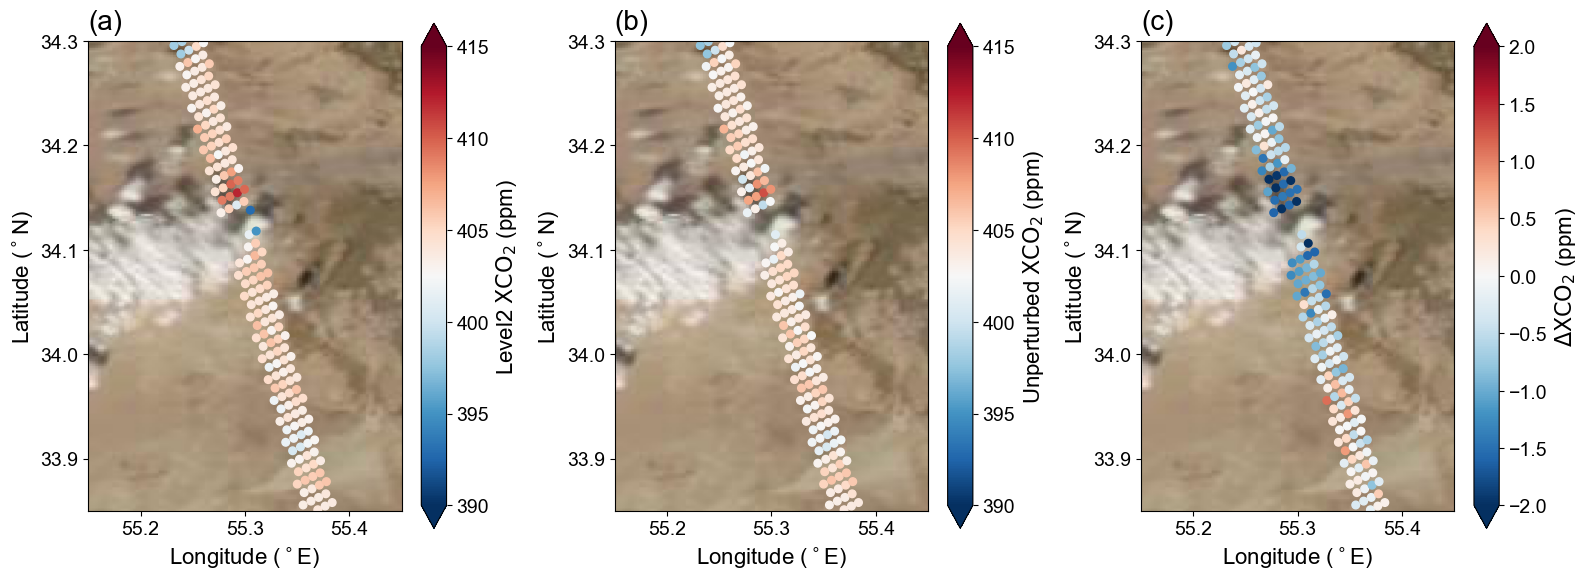

In [145]:
f, (ax1, ax2, ax3) =plt.subplots(1, 3, figsize=(16, 6))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
for ax in [ax1, ax2, ax3]:
    ax.imshow(img, extent=wesn)
    lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
    lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
    ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
    ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
    #ax.scatter(lon_2d[cth0>0], lat_2d[cth0>0], s=15, color='r')
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
    ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
    
mask = data['xco2_retrieved'][...]!=-2
c1 = ax1.scatter(df_25p['lon'], df_25p['lat'], 
               c=df_25p['xco2_L2_file'], s=30,
               cmap='RdBu_r', vmin=390, vmax=415)
cbar1 = f.colorbar(c1, ax=ax1, extend='both')
cbar1.set_label('Level2 $\mathrm{XCO_2}$ (ppm)', fontsize=label_size)
cbar1.ax.tick_params(labelsize=tick_size)

c2 = ax2.scatter(df_25p['lon'], df_25p['lat'], 
               c=df_25p['xco2_retrieved'], s=30,
               cmap='RdBu_r', vmin=390, vmax=415)
cbar2 = f.colorbar(c2, ax=ax2, extend='both')
cbar2.set_label('Unperturbed $\mathrm{XCO_2}$ (ppm)', fontsize=label_size)
cbar2.ax.tick_params(labelsize=tick_size)

c3 = ax3.scatter(df_25p['lon'], df_25p['lat'],
               c=df_25p['xco2_retrieved']-df_25p['xco2_L2_file'], s=30,
               cmap='RdBu_r', vmin=-2, vmax=2)
cbar3 = f.colorbar(c3, ax=ax3, extend='both')
cbar3.set_label('$\Delta \mathrm{XCO_2}$ (ppm)', fontsize=label_size)
cbar3.ax.tick_params(labelsize=tick_size)



xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(a)', fontsize=label_size+4, color='k')

xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(b)', fontsize=label_size+4, color='k')

xmin, xmax = ax3.get_xlim()
ymin, ymax = ax3.get_ylim()
ax3.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(c)', fontsize=label_size+4, color='k')



#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')

f.tight_layout()
f.savefig('MODIS_XCO2_retrieval_before_after_20181018_pixel_by_pixel.png', dpi=300)

In [146]:
(df_25p['xco2_retrieved']-df_25p['xco2_L2_file']).shape

(170,)

In [42]:
cld_xco2 = pd.read_csv('central_asia_2_footprint_cld_distance.csv')
# xco2 = cld_xco2['L2XCO2[ppm]']
cld_dist = cld_xco2['cld_distance']
# xco2_snd = cld_xco2['SND'].apply(lambda x: x[3:]).astype(int)

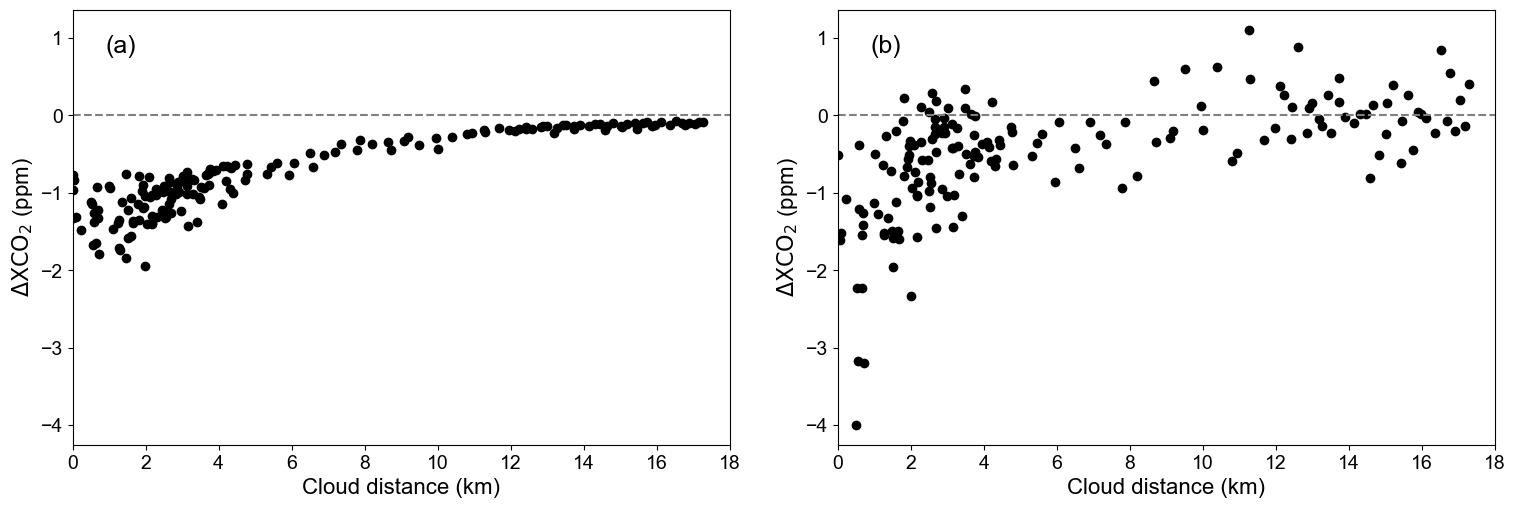

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=False)
fig.tight_layout(pad=5.0)
light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 16
legend_size = 16
tick_size = 14

x = cld_dist
y = xco2_unpert-xco2_l2

ax1.scatter(x, y, color='k')

#ax.set_xticks(range(0, 160, 20))
ax1.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax1.get_ylim()
xmin, xmax = ax1.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = 0., 18.
#ax.set_ylim(ymin, ymax)
ax1.set_xlim(xmin, xmax)




x = cld_dist
y = df_25p['xco2_retrieved']-df_25p['xco2_L2_file']

ax2.scatter(x, y, color='k')

#ax.set_xticks(range(0, 160, 20))
ax2.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax2.get_ylim()
xmin, xmax = ax2.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = 0., 18.
#ax.set_ylim(ymin, ymax)
ax2.set_xlim(xmin, xmax)

#ax.legend(loc='center left', bbox_to_anchor=(0.65, 0.15), fontsize=legend_size)
for i in range(2):
    ax = [ax1, ax2][i]
    ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
    ax.set_ylabel('$\Delta \mathrm{XCO_2}$ (ppm)', fontsize=label_size)
    ax.hlines(0, xmin, xmax, linestyles='--', colors='grey')
    ax.text((xmin+(xmax-xmin)*0.05), (ymin+(ymax-ymin)*0.9), ['(a)', '(b)'][i], fontsize=18)
    ax.set_ylim(ymin, ymax)
# ax.set_title('title', fontsize=title_size)
fig.savefig('Delta_XCO2_comparison_cld_para_pixel-by-pixel.png', dpi=300)
plt.show()

weighted_mean_para: -0.7386565613467702
weighted_mean_pixel: -0.4548846974895746


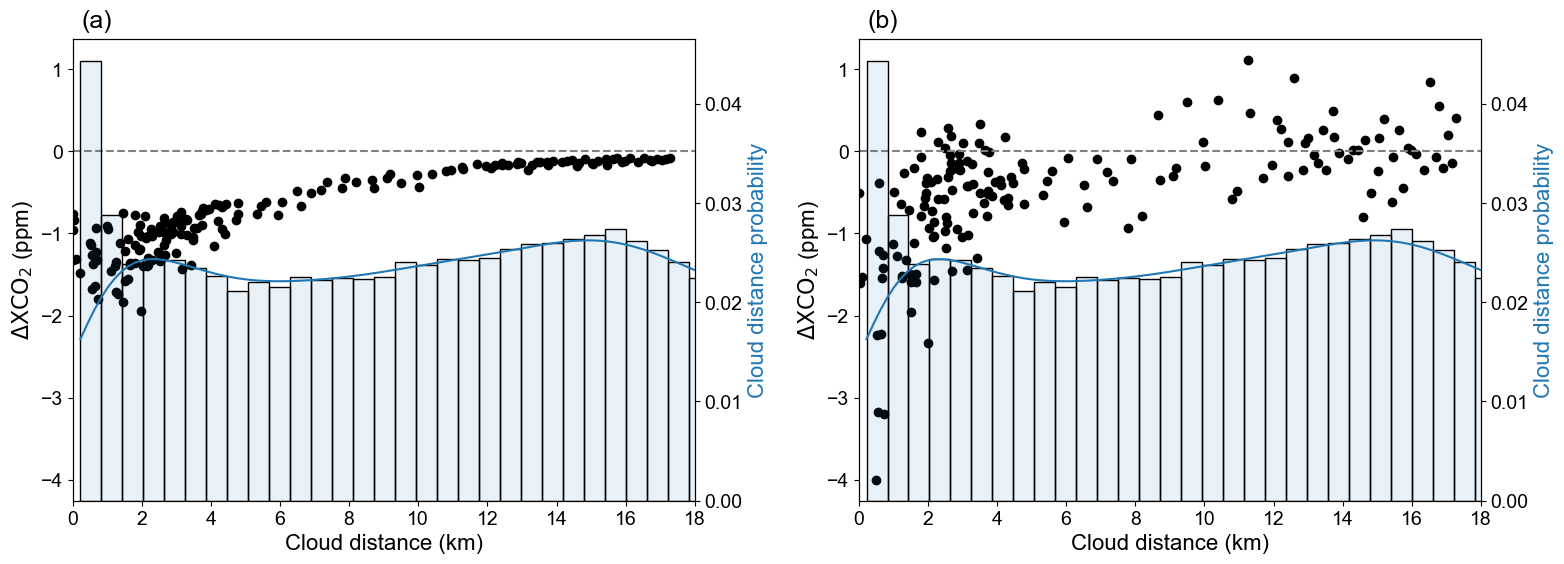

In [208]:
from scipy import interpolate
cfg_name = '20181018_central_asia_2_470cloud_test2.csv'
cloud_dist = np.load(f'{cfg_name[:-4]}_cld_distance_pdf.npy')
mask = cloud_dist>0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 16
legend_size = 16
tick_size = 14

x = cld_dist
y = xco2_unpert-xco2_l2

ax1.scatter(x, y, color='k')

#ax.set_xticks(range(0, 160, 20))
ax1.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax1.get_ylim()
xmin, xmax = ax1.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = 0., 18.
#ax.set_ylim(ymin, ymax)
ax1.set_xlim(xmin, xmax)

ax1_2 = ax1.twinx()
kde = sns.histplot(x = cloud_dist[mask].flatten(), kde = True, stat='probability',
             kde_kws = {'bw_adjust': 1.5},
             ax=ax1_2, alpha=0.1)

kde_curve = kde.lines[0]
kde_x = kde_curve.get_xdata()
kde_y = kde_curve.get_ydata()
f = interpolate.interp1d(kde_x, kde_y, fill_value='extrapolate')
prob = f(cld_dist)
weighted_mean_para = np.sum(y*prob)/np.sum(prob)
print(f'weighted_mean_para: {weighted_mean_para}')

ax1_2.set_ylabel('Cloud distance probability', fontsize=label_size, color='tab:blue')
ax1_2.tick_params(axis='both', labelsize=tick_size)


x = cld_dist
y = df_25p['xco2_retrieved']-df_25p['xco2_L2_file']

ax2.scatter(x, y, color='k')

#ax.set_xticks(range(0, 160, 20))
ax2.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax2.get_ylim()
xmin, xmax = ax2.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = 0., 18.
#ax.set_ylim(ymin, ymax)
ax2.set_xlim(xmin, xmax)

ax2_2 = ax2.twinx()
sns.histplot(x = cloud_dist[mask].flatten(), kde = True, stat='probability',
             kde_kws = {'bw_adjust': 1.5},
             ax=ax2_2, alpha=0.1)
ax2_2.set_ylabel('Cloud distance probability', fontsize=label_size, color='tab:blue')
ax2_2.tick_params(axis='both', labelsize=tick_size)

weighted_mean_pixel = np.sum(y*prob)/np.sum(prob)
print(f'weighted_mean_pixel: {weighted_mean_pixel}')

#ax.legend(loc='center left', bbox_to_anchor=(0.65, 0.15), fontsize=legend_size)
for i in range(2):
    ax = [ax1, ax2][i]
    ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
    ax.set_ylabel('$\Delta \mathrm{XCO_2}$ (ppm)', fontsize=label_size)
    ax.hlines(0, xmin, xmax, linestyles='--', colors='grey')
    ax.text((xmin+(xmax-xmin)*0.015), (ymin+(ymax-ymin)*1.025), ['(a)', '(b)'][i], fontsize=18)
    ax.set_ylim(ymin, ymax)
# ax.set_title('title', fontsize=title_size)
fig.tight_layout(pad=2.0)
# fig.savefig('Delta_XCO2_comparison_cld_para_pixel-by-pixel.png', dpi=300)
plt.show()

weighted_mean_para: -0.7612655495920079


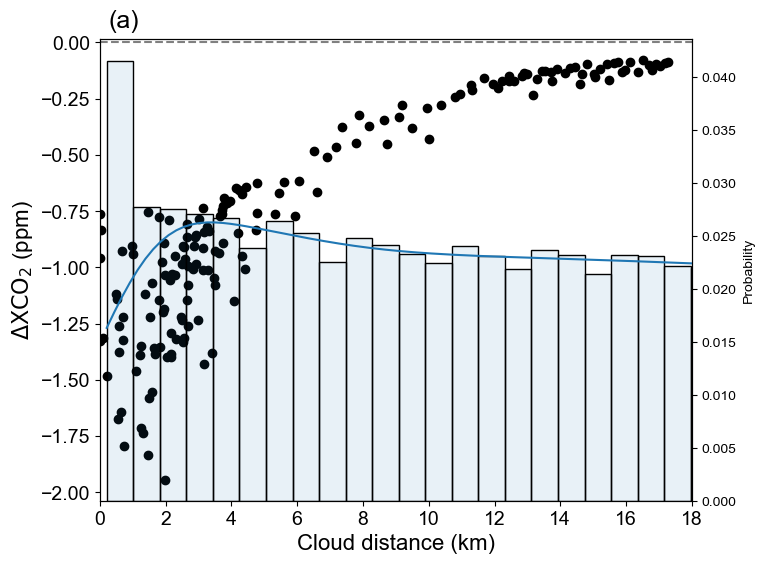

In [211]:
cfg_name = '20181018_central_asia_2_470cloud_test2.csv'

# cfg_name = '20181018_central_asia_2_470cloud_test2.csv'
# cfg_name = '20161023_north_france_test.csv'
cfg_name = '20151219_north_italy_470cloud_test.csv'
# cfg_name= '20170605_amazon_470cloud.csv'
# cfg_name = '20150622photon_163_225_470cloud.csv'

cloud_dist = np.load(f'{cfg_name[:-4]}_cld_distance_pdf.npy')
mask = cloud_dist>0

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=False)

light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 16
legend_size = 16
tick_size = 14

x = cld_dist
y = xco2_unpert-xco2_l2

ax1.scatter(x, y, color='k')

#ax.set_xticks(range(0, 160, 20))
ax1.tick_params(axis='both', labelsize=tick_size)

ymin, ymax = ax1.get_ylim()
xmin, xmax = ax1.get_xlim()
#ymin, ymax = -1., 1.
xmin, xmax = 0., 18.
#ax.set_ylim(ymin, ymax)
ax1.set_xlim(xmin, xmax)

ax1_2 = ax1.twinx()
kde = sns.histplot(x = cloud_dist[mask].flatten(), kde = True, stat='probability',
             kde_kws = {'bw_adjust': 1.5},
             ax=ax1_2, alpha=0.1)

kde_curve = kde.lines[0]
kde_x = kde_curve.get_xdata()
kde_y = kde_curve.get_ydata()
f = interpolate.interp1d(kde_x, kde_y, fill_value='extrapolate')
prob = f(cld_dist)
weighted_mean_para = np.sum(y*prob)/np.sum(prob)
print(f'weighted_mean_para: {weighted_mean_para}')


for i in range(1):
    ax = [ax1][i]
    ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
    ax.set_ylabel('$\Delta \mathrm{XCO_2}$ (ppm)', fontsize=label_size)
    ax.hlines(0, xmin, xmax, linestyles='--', colors='grey')
    ax.text((xmin+(xmax-xmin)*0.015), (ymin+(ymax-ymin)*1.025), ['(a)', '(b)'][i], fontsize=18)
    ax.set_ylim(ymin, ymax)
# ax.set_title('title', fontsize=title_size)
fig.tight_layout(pad=2.0)
# fig.savefig('Delta_XCO2_comparison_cld_para_pixel-by-pixel.png', dpi=300)
plt.show()

404.06574117647057
0.06573176470588163
-0.6951351551844532
7.287796487223371
-0.6046154612962731


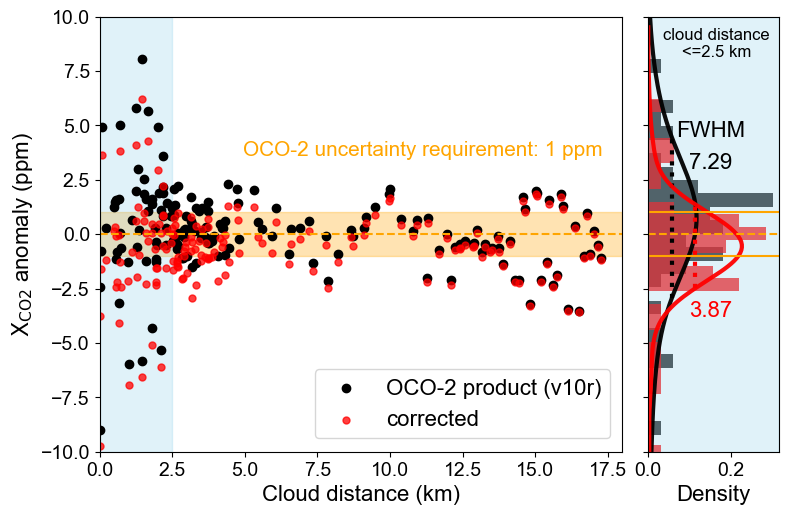

In [201]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6), sharex=False)
fig.tight_layout(pad=5.0)
light_jet = cm.jet#cmap_map(lambda x: x/3 + 0.66, cm.jet)


title_size = 18
label_size = 16
legend_size = 16
tick_size = 14


x = cld_dist
y = xco2_l2-404#np.mean(xco2_l2[xco2_l2>10])

print(np.mean(xco2_l2[xco2_l2>10]))
ax.hlines(0, 0, 18, linestyle='--', color='orange')
ax.fill_between([0, 18], -1, 1, color='orange', alpha=0.3)

ax.fill_betweenx([-10, 10], 0, 2.5, color='skyblue', alpha=0.25)

ax.scatter(x, y, color='k', label='OCO-2 product (v10r)')

#ax.set_xticks(range(0, 160, 20))
ax.tick_params(axis='both', labelsize=tick_size)


x = cld_dist
y = xco2_unpert-404
# y = df_25p['xco2_retrieved']-404#df_25p['xco2_L2_file']
print(np.mean(df_25p['xco2_L2_file']-404))
print(np.mean(y))
ax.scatter(x, y, color='r', s=25, alpha=0.75, label='corrected')

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ymin, ymax = -10., 10.
xmin, xmax = 0., 18.
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
ax.text((xmin+(xmax-xmin)*0.275), (ymin+(ymax-ymin)*0.68), 
        'OCO-2 uncertainty requirement: 1 ppm', color='orange', fontsize=15)

cld_mask = cld_dist<=2.5
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist((xco2_l2-404)[cld_mask], bins=31, orientation='horizontal', density=True, color='black', alpha=0.75)

ax_histy.hist(y[cld_mask], bins=31, orientation='horizontal', density=True, color='r', alpha=0.75)

black_kde = sns.kdeplot(y=(xco2_l2-404)[cld_mask], color='k', bw_adjust=1.5, linewidth=3, 
                        ax=ax_histy, alpha=0.95)


kde_curve = black_kde.lines[0]
black_kde_x = kde_curve.get_xdata()
black_kde_y = kde_curve.get_ydata()
halfmax = black_kde_x.max() / 2
maxpos = black_kde_x.argmax()
leftpos = (np.abs(black_kde_x[:maxpos] - halfmax)).argmin()
rightpos = (np.abs(black_kde_x[maxpos:] - halfmax)).argmin() + maxpos
fullwidthathalfmax = black_kde_y[rightpos] - black_kde_y[leftpos]

ax_histy.vlines(halfmax, black_kde_y[leftpos], black_kde_y[rightpos], color='k', ls=':', linewidth=3)
ax_histy.text(0.15, 2.75,
              #halfmax*2,
              f'{fullwidthathalfmax:.2f}\n',
              color='k', ha='center', va='center', fontsize=legend_size)

ax_histy.text(0.15, 4.75,
              #halfmax*2,
              'FWHM',
              color='k', ha='center', va='center', fontsize=legend_size)


print(fullwidthathalfmax)


red_kde = sns.kdeplot(y=xco2_unpert-404, color='r', bw_adjust=1.5, linewidth=3, 
                      ax=ax_histy, alpha=0.95)

red_kde_curve = red_kde.lines[1]
red_kde_x = red_kde_curve.get_xdata()
red_kde_y = red_kde_curve.get_ydata()
halfmax = red_kde_x.max() / 2
maxpos = red_kde_x.argmax()
leftpos = (np.abs(red_kde_x[:maxpos] - halfmax)).argmin()
rightpos = (np.abs(red_kde_x[maxpos:] - halfmax)).argmin() + maxpos
fullwidthathalfmax = red_kde_y[rightpos] - red_kde_y[leftpos]

ax_histy.vlines(halfmax, red_kde_y[leftpos], red_kde_y[rightpos], color='r', ls=':', linewidth=3)
print(red_kde_y[maxpos])
ax_histy.text(0.15, -4.05,
              #halfmax*2,
              f'{fullwidthathalfmax:.2f}\n',
              color='r', ha='center', va='center', fontsize=legend_size)

ax_histy.text(0.165, 8.75,
              #halfmax*2,
              'cloud distance\n<=2.5 km',
              color='k', ha='center', va='center', fontsize=legend_size-4)


hist_xmin, hist_xmax = ax_histy.get_xlim()
ax_histy.set_xlim(hist_xmin, hist_xmax)
ax_histy.tick_params(axis='both', labelsize=tick_size)
ax_histy.set_xlabel('Density', fontsize=label_size)

ax_histy.hlines(0, hist_xmin, hist_xmax, linestyle='--', color='orange')
ax_histy.hlines([-1, 1], hist_xmin, hist_xmax, linestyle='-', color='orange')
# ax_histy.fill_between([hist_xmin, hist_xmax], -1, 1, color='orange', alpha=0.3)
ax_histy.fill_betweenx([-10, 10], hist_xmin, hist_xmax, color='skyblue', alpha=0.25)

ax.legend(loc='center left', bbox_to_anchor=(0.39, 0.11), fontsize=legend_size)
ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
ax.set_ylabel('$\mathrm{X_{CO2}}$ anomaly (ppm)', fontsize=label_size)
# ax.set_title('title', fontsize=title_size)
plt.show()
# fig.savefig('Delta_XCO2_cloud_distance_cld_parameterization.png', dpi=300)

In [129]:
o1.lat2d[ 0,:]

array([33.70124172, 33.70372517, 33.70620861, 33.70869205, 33.7111755 ,
       33.71365894, 33.71614238, 33.71862583, 33.72110927, 33.72359272,
       33.72607616, 33.7285596 , 33.73104305, 33.73352649, 33.73600993,
       33.73849338, 33.74097682, 33.74346026, 33.74594371, 33.74842715,
       33.7509106 , 33.75339404, 33.75587748, 33.75836093, 33.76084437,
       33.76332781, 33.76581126, 33.7682947 , 33.77077815, 33.77326159,
       33.77574503, 33.77822848, 33.78071192, 33.78319536, 33.78567881,
       33.78816225, 33.7906457 , 33.79312914, 33.79561258, 33.79809603,
       33.80057947, 33.80306291, 33.80554636, 33.8080298 , 33.81051325,
       33.81299669, 33.81548013, 33.81796358, 33.82044702, 33.82293046,
       33.82541391, 33.82789735, 33.83038079, 33.83286424, 33.83534768,
       33.83783113, 33.84031457, 33.84279801, 33.84528146, 33.8477649 ,
       33.85024834, 33.85273179, 33.85521523, 33.85769868, 33.86018212,
       33.86266556, 33.86514901, 33.86763245, 33.87011589, 33.87

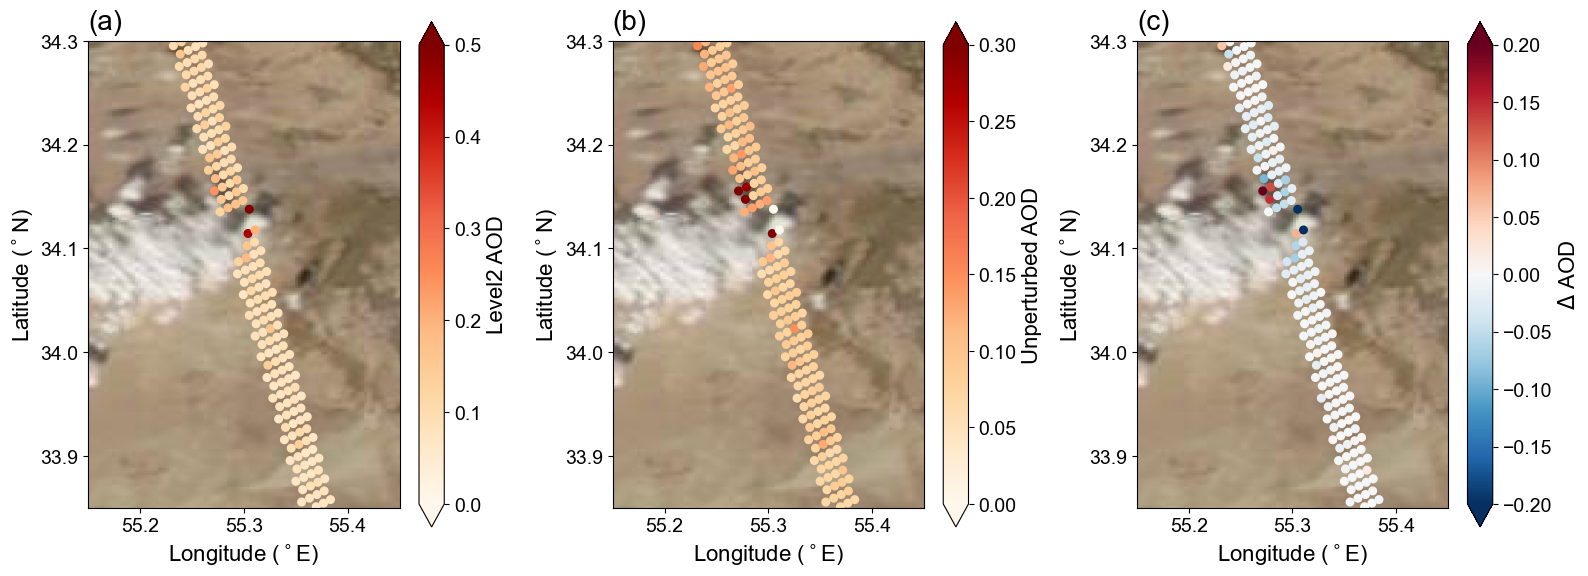

In [150]:
f, (ax1, ax2, ax3) =plt.subplots(1, 3, figsize=(16, 6))
png       = ['../simulation/data/20181018_central_asia_2_470cloud_20181018/aqua_rgb_2018-10-18_55.00-55.60-33.70-34.45.png',
         [55.00, 55.60, 33.70, 34.45]]
img = png[0]
wesn= png[1]
img = png[0]
wesn= png[1]
img = mpimg.imread(img)
for ax in [ax1, ax2, ax3]:
    ax.imshow(img, extent=wesn)
    lon_dom = [wesn[0]+0.15, wesn[1]-0.15]
    lat_dom = [wesn[2]+0.15, wesn[3]-0.15]
    ax.set_xlim(np.min(lon_dom), np.max(lon_dom))
    ax.set_ylim(np.min(lat_dom), np.max(lat_dom))
    #ax.scatter(lon_2d[cth0>0], lat_2d[cth0>0], s=15, color='r')
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.set_xlabel('Longitude ($^\circ$E)', fontsize=label_size)
    ax.set_ylabel('Latitude ($^\circ$N)', fontsize=label_size)
    
mask = data['xco2_retrieved'][...]!=-2
c1 = ax1.scatter(df_25p['lon'], df_25p['lat'], 
               c=l2_aod, s=30,
               cmap='OrRd', vmin=0, vmax=0.5)
cbar1 = f.colorbar(c1, ax=ax1, extend='both')
cbar1.set_label('Level2 AOD', fontsize=label_size)
cbar1.ax.tick_params(labelsize=tick_size)

c2 = ax2.scatter(df_25p['lon'], df_25p['lat'], 
               c=df_25p['aod'], s=30,
               cmap='OrRd', vmin=0, vmax=0.3)
cbar2 = f.colorbar(c2, ax=ax2, extend='both')
cbar2.set_label('Unperturbed AOD', fontsize=label_size)
cbar2.ax.tick_params(labelsize=tick_size)

c3 = ax3.scatter(df_25p['lon'], df_25p['lat'],
               c=df_25p['aod']-l2_aod, s=30,
               cmap='RdBu_r', vmin=-0.2, vmax=0.2)
cbar3 = f.colorbar(c3, ax=ax3, extend='both')
cbar3.set_label('$\Delta$ AOD', fontsize=label_size)
cbar3.ax.tick_params(labelsize=tick_size)



xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(a)', fontsize=label_size+4, color='k')

xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(b)', fontsize=label_size+4, color='k')

xmin, xmax = ax3.get_xlim()
ymin, ymax = ax3.get_ylim()
ax3.text(xmin+0.0*(xmax-xmin), ymin+1.025*(ymax-ymin), '(c)', fontsize=label_size+4, color='k')



#for i in range(len(boundary_list)):
#    boundary = boundary_list[i]
#    plot_rec(np.mean(boundary[0][:2]), np.mean(boundary[0][2:]), 
#             0.5, lat_interval, 
#             frame, 'r')
#plt.legend(fontsize=16, facecolor='white')

f.tight_layout()
f.savefig('MODIS_AOD_retrieval_before_after_20181018_pixel_by_pixel.png', dpi=300)